# **Principle of Data Learning**

# 1 Deep dive
pg. 17-24

### Aim of this book:
- Understand the role of **liquidity, equity** and many other key banking features;
- Engineer and select features;
- Predict defaults, payoffs, loss rates and exposures;
- Predict downturn and crisis outcomes using pre-crisis features;
- Understand the implications of COVID-19;
- Apply innovative **sampling techniques** for model training and validation;
- Deep-learn from Logit Classifiers to **Random Forests** and Neural Networks
- Do unsupervised Clustering, Principal Components and **Bayesian Techniques**;
- Build **multi-period** models for CECL, IFRS 9 and CCAR;
- Build credit portfolio correlation models for value-at-risk and expected shortfall; and
- Run over 1,500 lines of pandas, statsmodels and scikit-learn Python code (`statsmodels`, `scikit-learn`, ...)
- Access real credit data and much more . . .

### Targetted reader
**Credit analysts** in financial institutions, fin-techs and prudential regulators

### Credit risk information

+ Internal data:
    - origination / underwrinting data: from **LOS**;
    - performance: monthly / quarterly / annually review covered from the orgination to latest review from **LMS**;
    - modification: e.g *restructure???*;
    - payoff / retention;
    - maturity: relates to maturity time like *release of collateal* or various of accounting activities;
    - default / workout: data from default to resolution or collection, can cover up to 10 years!
+ External data:
    - macro: time varying information that is identical at a given period for all borrowers, maybe **stratified** by country, state, statistiscal area, etc;
    - population stats;
    - etc like: business filings, data from social networks, ratings agencies, property appraisers, activity profiles of payment systems or transport systems.

--> Panel data:
+ features (*also known as covariates, risk factors, explanatory variables, independent variables and right-hand side variables*);
+ risk-outcomes (*also known as responses, outputs, dependent variables and left-hand side variables*): default, payoff, loss rates, exposures;
+ for each loan (`i`) and time (`t`).

### Things to consider
- Any information that is used in a model must be **measurable** through **sensor** since the model is used to **predict risk outcomes** for new borrowers, loans;
- Identifiers:
  + *borrowers* or *loans*;
  + time: application time, origination time, observation time, payoff time, default time and maturity time;
  + think about the scenario that the borrower may be part of a larger holding structure, family, or benefit from guarantees that have credit-risk relevant relationships.
- relationships of features and outcomes can be reciprocal or one-way (???).

### The dataset
+ Panel form: 5k residential US mortgage borrower over 60 periods (quarters);
+ Central vars: `id`, and `time`;
+ Starts at the beginning of the millennium, includes the Global Financial Crisis (GFC) in period 27 approximately;
+ Origination times prior to the start of the observation period have negative numbers;
+ Default, payoff and status events are observed one period after features in the same row;
+ LGD and related recoveries are observed between the default and resolution time;
+ The loans are not observed immediately after origination;
+ Order of informations:
    - Borrower IDs;
    - Time stamps;
    - Information features at observation time;
    - Information features at loan origination;
    - Outcome observations.
+ Key variables:
    - `id`: borrower id;
    - `time`: time stamp of observation;
    - `orig_time`: time stamp for origination;
    - `first_time`: time stamp for first observation;
    - `mat_time`: time stamp for maturity;
    - `res_time`: time stamp for resolution;
    - `balance_time`: outstanding balance at observation time;
    - `LTV_time`: loan to value ratio at observation time, in %;
    - `interest_rate_time`: interest rate at observation time, in %;
    - `rate_time`: risk-free rate at observation time, in %;
    - `hpi_time`: house price index at observation time, base year=100;
    - `gdp_time`: GDP growth at observation time, in %;
    - `uer_time`: unemployment rate at observation time, in %;
    - `REtype_CO_orig_time`: real estate type — condominium: 1, otherwise: 0;
    - `REtype_PU_orig_time`: real estate type — planned urban developments: 1, otherwise: 0;
    - `REtype_SF_orig_time`: real estate type — single family home: 1, otherwise: 0;
    - `investor_orig_time`: investor borrower: 1, otherwise: 0;
    - `balance_orig_time`: outstanding balance at origination time;
    - `FICO_orig_time`: FICO score at origination time, in %;
    - `LTV_orig_time`: loan to value ratio at origination time, in %;
    - `Interest_Rate_orig_time`: interest rate at origination time, in %;
    - `state_orig_time`: US state in which the property is located;
    - `hpi_orig_time`: house price index at origination time, base year=100;
    - `default_time`: default outcome at observation time;
    - `payoff_time`: payoff outcome at observation time;
    - `status_time`: default (1), payoff (2) and non-default/non-payoff (0) outcome at observation time;
    - `lgd_time`: LGD outcome, at default time, assuming no discounting of cash flows;
    - `recovery_res`: sum of all outcome cash flows received during resolution period.
+ `lgd_time`, `recovery_res` and `res_time` are only observed for default_time=1 and if the resolution process is complete;
+ `LTV_time` = balance_time / house price at time;
+ house price at time = house price at origination * ( `hpi_time` / `hpi_orig_time` );
+ house price at origination = `balance_orig_time` / `LTV_orig_time`;

### Basel, CECL, IFRS 9, DFAST, CCAR and Stress Tests

Critical standards:
- Basel: **minimum** amount of required Tier I and Tier II capital. Basel may include the various reforms (Basel I to Basel III), and a number of nationally issued guidance notes;
- Current Expected Credit Loss (CECL), IFRS 9: loan loss **provisioning** and **eligible amount** of available Tier I capital;
- National stress tests (e.g., Dodd-Frank Act Stress Test (DFAST) or Federal Reserve Bank (FRB) stress tests in the US): requirement of **additional capital buffers**;
- Comprehensive Capital Analysis and Review (CCAR): requirement of **additional capital buffers**.

Regulations might differ:
- Basel requires through-the-cycle PDs, Downturn EADs and Downturn LGDs. CCAR, CECL;
- IFRS 9 require Lifetime PDs and EADs/LGDs that are based on current economic circumstances and are forward-looking, i.e., take future expectations into account;
- DFAST and FRB stress tests require stressed PDs, LGDs and EADs.

### Lessons from the COVID-19 Crisis

- Impact seems to be more critical than GFC;
- Behaviours by banks and governments might temporarily reduce risk in short-term, but might increase in long-term;
- Variable: `cep_time`;
- Equity next to liquidity is a central aspect, variable `equity_time`;
- Time effects;
- Challenges:
  + *Calculating Crisis PDs without downturn data* -> Model-based measurement of crisis PDs, Parameter-based stress-testing (Margin of conservatism, Bayesian approach); or
  + Scenario-based stress-testing, Parameter-based stress-testing (Regime-switching models);
  + *Liquidity as a driver of default* -> Estimation of models with liquidity as feature; Inclusion of additional liquidity feature (e.g., income over non-discretionary expenses);
  + *Impact of time effects* -> TVA Analysis: control for vintage and age effects through dummy variables or other features that describe the origination process and for time effects  through macroeconomic features;
  + *Low default portfolios* -> Most prudent estimators/Margin of conservatism;
  + *Validation of pre-crisis models* -> Backtesting: split training and validation sample along time dimension;
  + *Ability of machine learning models to predict defaults for severe downturns* -> Backtesting of machine learning approaches;
  + *Adequacy of model estimates for Basel requirements* -> Comparison of Basel capital with expected loss.
- Main elements of the approach in the book:
  + model calibrations should include the latest credit data;
  + features that are identified as drivers of credit risk outcomes should be included in the models;
  + validation should focus on backtesting and include a train-test split along the time line;
  + the adequacy of model estimates for applications like capital adequacy, loan loss provisioning and loan pricing needs to be vetted.

### Machine Learning

- lower variable costs;
- higher degree automatized;
- credit risk generally realizes in time-lags;
- advanced models can adjust quicker to the new risk levels than traditional models.

# 2 Python Literacy
pg. 25-46

### What Python is used for in this book:

- Describing data;
- Plotting data;
- Generating new variables;
- Transforming variables;
- Subsetting data;
- Combining data;
- Regression models.

### Packages

Data processing:
+ `pandas`: Processing data structures: series (1D) and dataframes (2D); see The pandas development team (2020). What pandas offers:
  - indexing based on labels (`.loc`) as well as positions (`.iloc`);
  - data sub-setting;
  - dataset splitting, merging and joining;
  - time-series functionality;
+ `numpy`: Processing of n-dimensional array objects, see Harris et al. (2020);
+ `scipy`: Submodule for statistics, see Virtanen et al. (2020);
+ `matplotlib`: Plotting library, see Hunter (2007);
+ `math`: Mathematical functions, see VanRossum and Drake (2009);
+ `random`: Random number generator,see VanRossum and Drake (2009);
+ `tabulate`: Printing tabular data;
+ `joblib`: Running functions as pipeline jobs, see Joblib Development Team (2020);
+ `pickle`: Converting a object to a file for saving, see VanRossum and Drake (2009);
+ `scikit-learn`: Machine learning techniques, see Pedregosa et al. (2011);

Building models:
+ `statsmodels`: Fitting statistical models. Interacts with pandas data frames to fit statistical models, see Seabold and Perktold (2010);
+ `IPython`: Interactive computing, see Pérez and Granger (2007);
+ `pydot` and `graphviz`: Plotting of decision trees;
+ `pymc3`: Probabilistic programming, see Salvatier et al. (2016);
+ `lifelines`: Survival analysis, see Davidson-Pilon (2019);
+ `lightgbm`: Gradient boosting, see Ke et al. (2017).

### Coding guidelines
+ Limit the number of dataset copies;
+ Limit the use of non-common packages;
+ Name functions and datasets with lower case letters;
+ Use label-based indexing (`.loc`);
+ Separate individual steps with an empty line;
+ Insert comments using hashtags;
+ Random draws are hard-coded using seeds;
+ You may set up virtual environment to hard-code versions of packages and ensure that the same results are obtained in later executions.

### First look

In [14]:
import warnings; warnings.simplefilter('ignore')
from dcr import * 
# import a dataframe named "data"
# and all the packages needed for this book :)

# config the plot output
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})

#### Creating object, sub-sampling features, printing result

In [59]:
data2 = data[['id', 'time', 'gdp_time', 'FICO_orig_time', 'LTV_time']]
data2.head()

,id,time,gdp_time,FICO_orig_time,LTV_time
0,4.0,25.0,2.90,587.0,33.91
1,4.0,26.0,2.15,587.0,34.01
2,4.0,27.0,2.36,587.0,34.34
3,4.0,28.0,1.23,587.0,34.67
4,4.0,29.0,1.69,587.0,34.95


#### Chaining

In [3]:
data2 = data[['id', 'time', 'gdp_time', 'FICO_orig_time', 'LTV_time']].round(decimals=2)
data2.head(5)

,id,time,gdp_time,FICO_orig_time,LTV_time
0,4,25,2.90,587,33.91
1,4,26,2.15,587,34.01
2,4,27,2.36,587,34.34
3,4,28,1.23,587,34.67
4,4,29,1.69,587,34.95


#### Describing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62178 non-null  int64  
 1   time                     62178 non-null  int64  
 2   orig_time                62178 non-null  int64  
 3   first_time               62178 non-null  int64  
 4   mat_time                 62178 non-null  int64  
 5   res_time                 1160 non-null   float64
 6   balance_time             62178 non-null  float64
 7   LTV_time                 62153 non-null  float64
 8   interest_rate_time       62178 non-null  float64
 9   rate_time                62178 non-null  float64
 10  hpi_time                 62178 non-null  float64
 11  gdp_time                 62178 non-null  float64
 12  uer_time                 62178 non-null  float64
 13  REtype_CO_orig_time      62178 non-null  int64  
 14  REtype_PU_orig_time   

In [5]:
# get dimension of the data
data.shape

(62178, 28)

In [9]:
# another way to view all columns
data.columns.values

array(['id', 'time', 'orig_time', 'first_time', 'mat_time', 'res_time',
       'balance_time', 'LTV_time', 'interest_rate_time', 'rate_time',
       'hpi_time', 'gdp_time', 'uer_time', 'REtype_CO_orig_time',
       'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time',
       'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time',
       'Interest_Rate_orig_time', 'state_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'lgd_time',
       'recovery_res'], dtype=object)

In [11]:
data2 = data[['FICO_orig_time', 'LTV_orig_time', 'gdp_time']]

data2.describe().round(decimals = 2)

,FICO_orig_time,LTV_orig_time,gdp_time
count,62178.00,62178.00,62178.00
mean,673.36,78.70,1.38
std,72.10,10.24,1.95
min,429.00,50.10,-4.15
25%,628.00,75.00,1.10
50%,675.00,80.00,1.85
75%,730.00,80.00,2.69
max,819.00,119.80,5.13


- FICO between 429 and 819, avg is 673;
- LTV ranges from 50.1% and 119.8%, value exceed than 100% implies that loan at origination is greater than collaterizing house value. It's common for bank to lend at 80% - median;
- ...

#### Tabulating

In [19]:
table = pd.crosstab(data.orig_time, columns='count', margins=True)

print(table.head(10))

col_0      count  All
orig_time            
-40           51   51
-35            4    4
-33            3    3
-24            1    1
-23            1    1
-21            1    1
-19           24   24
-18           16   16
-16           19   19
-15           14   14


We more specify 2 columns for the cross-tabulated report

For eg., like this: `print(pd.crosstab(data.orig_time, data.time, margins= True))`

#### Resetting Index

In [21]:
data2 = data2.reset_index(drop=True) # if drop = False, the old index will be stored as a new variable called "Index"

data2.index

RangeIndex(start=0, stop=62178, step=1)

#### Calculating Mean Values by Time

eg. compute mean of FICO at origination over Time

In [24]:
data2 = data

FICO = data2.groupby('time')['FICO_orig_time'].mean().reset_index(drop=False)
# we retains the old index as a new variable, this is useful if we want to process index as a feature in pandas

FICO.head(10)

,time,FICO_orig_time
0,1,587.666667
1,2,602.254902
2,3,603.104167
3,4,601.380435
4,5,601.150538
5,6,597.878788
6,7,594.651685
7,8,587.337662
8,9,589.362500
9,10,590.821918


#### Plotting

The mean of FICO increased over time indicated a tigher lending policy

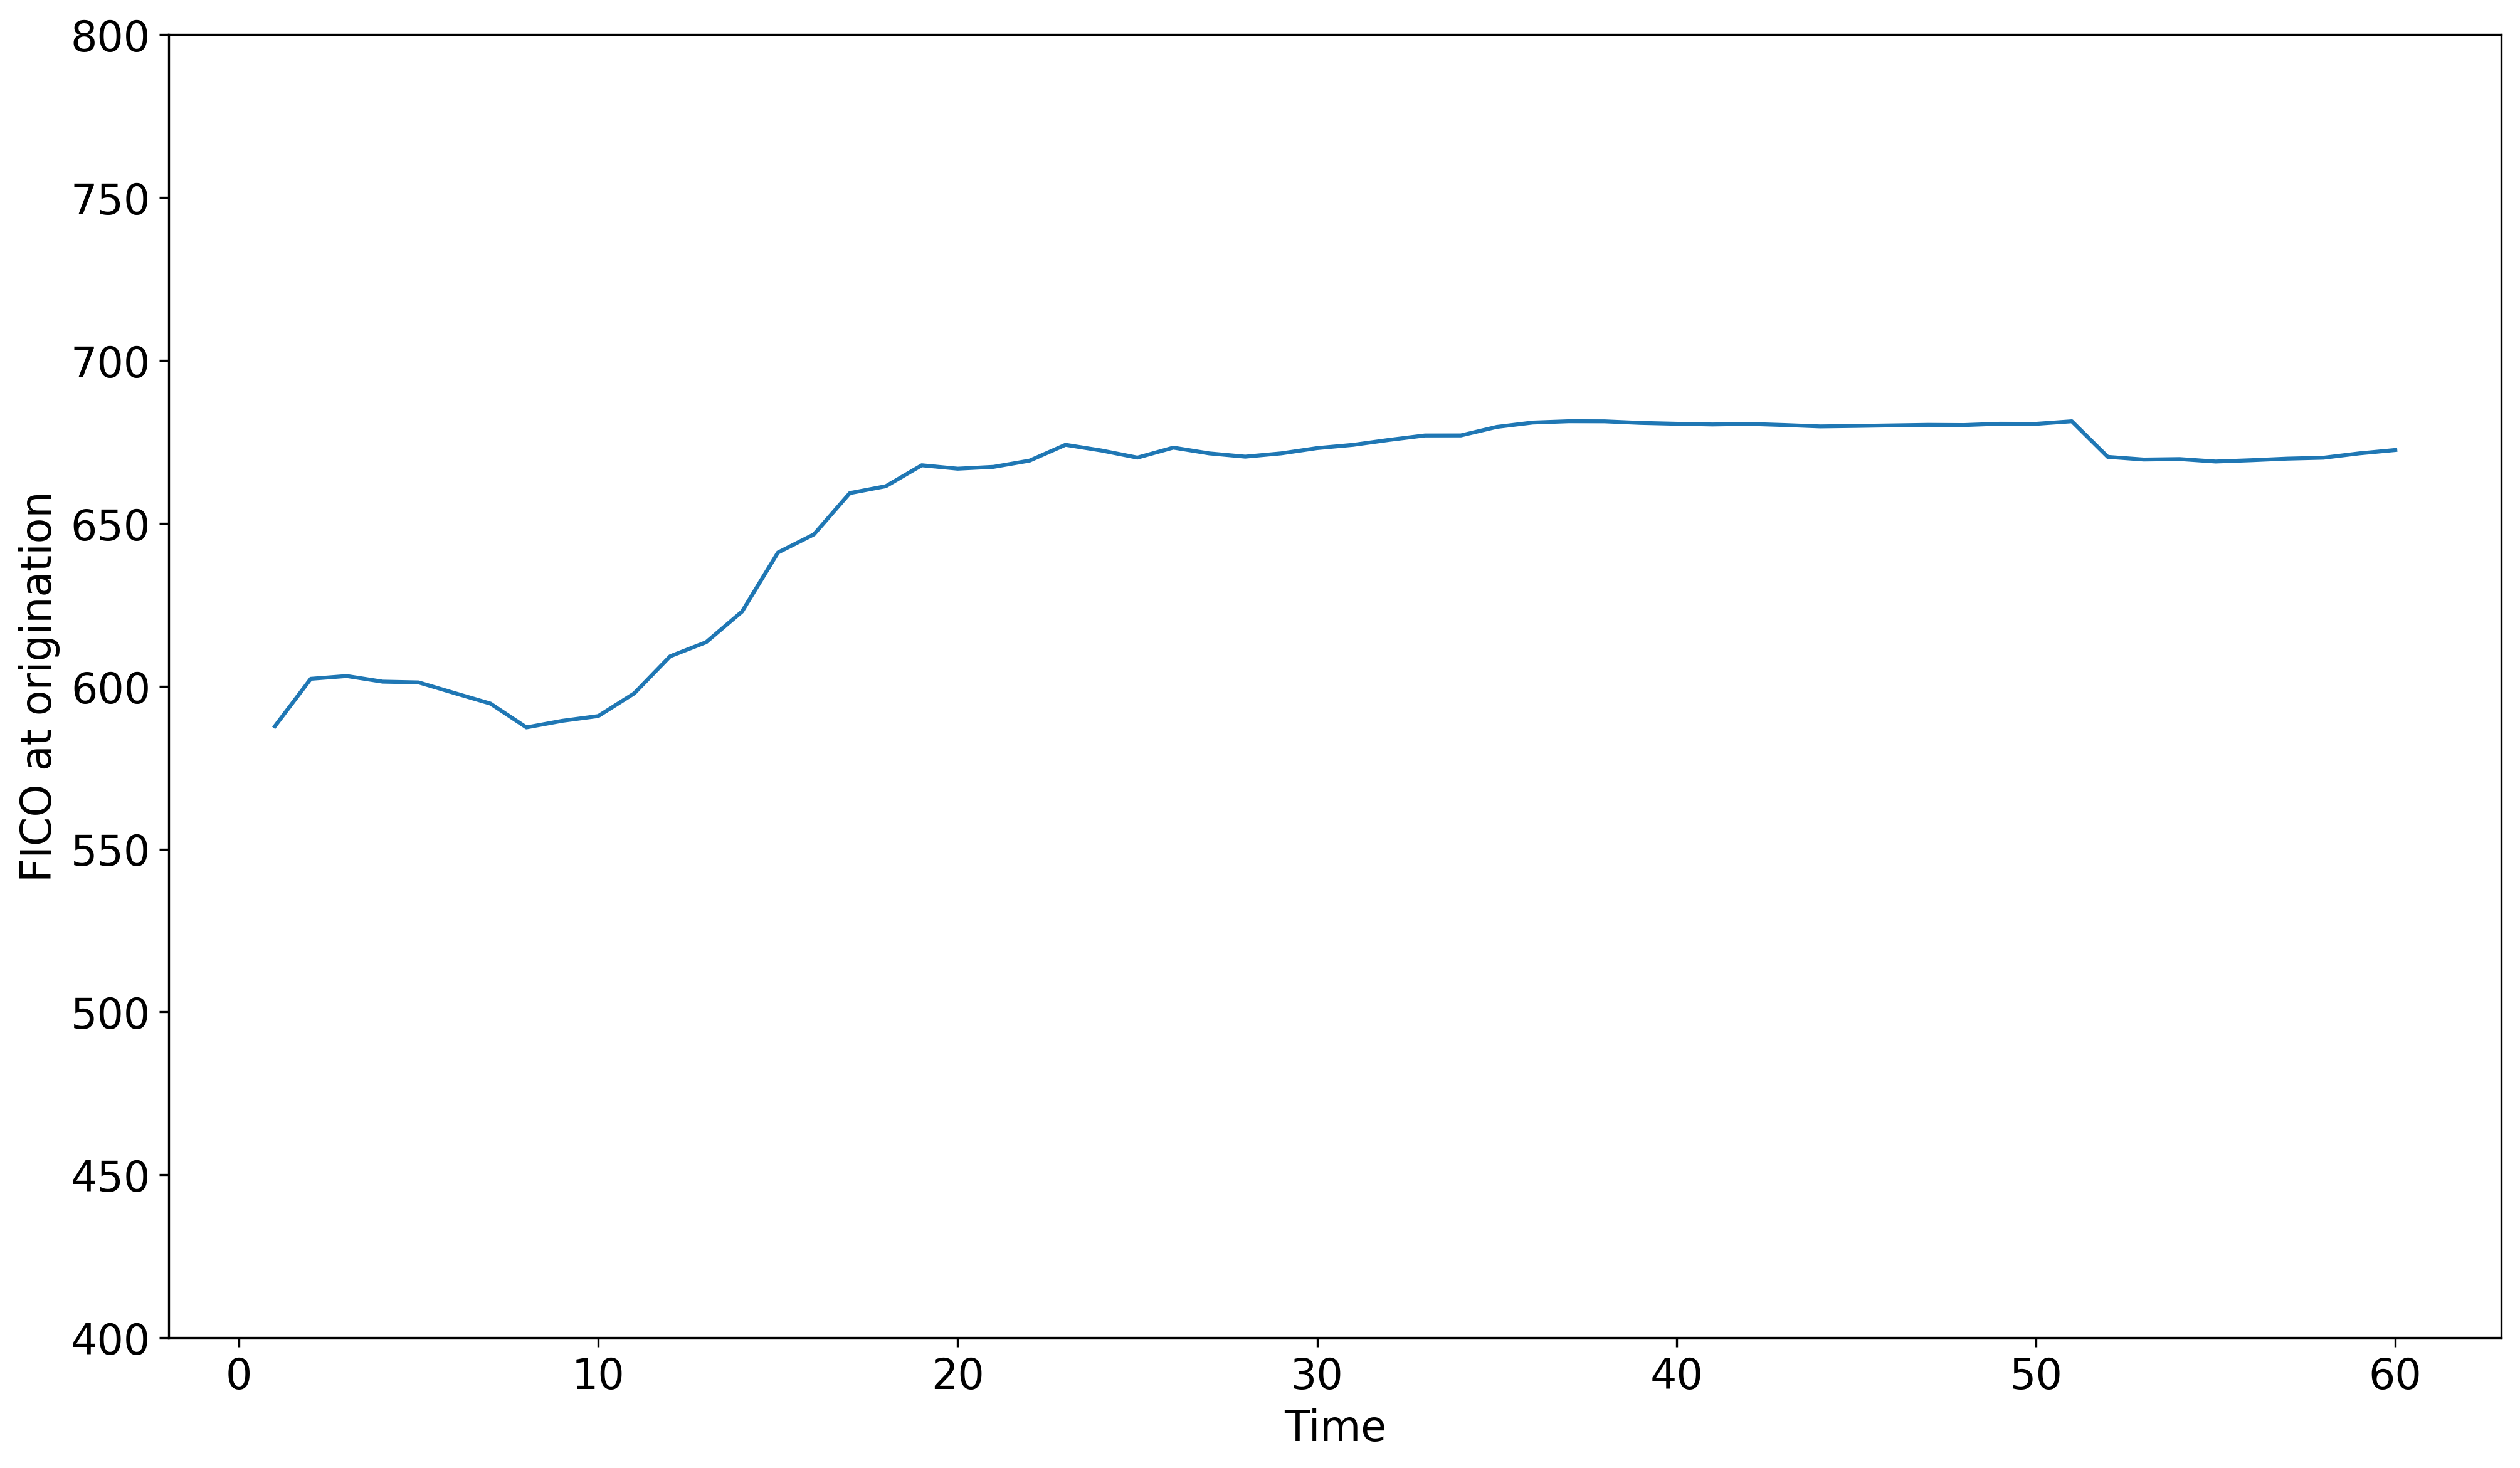

In [25]:
plt.plot('time', 'FICO_orig_time', data=FICO)
plt.xlabel('Time')
plt.ylabel('FICO at origination')
plt.ylim([400, 800])
plt.show()

#### Generating new variables

In [26]:
data.loc[:, 'dummy'] = 0
# generating a new column dummy = 0

In [28]:
data.loc[data['LTV_orig_time'] > 70, 'dummy'] = 1
# create new variable dummy and set it = 1 if LTV orig time is > 70

# data[['LTV_orig_time']].round(decimals = 2)

#### Transforming variables

In [29]:
data.loc[:, 'FICO_orig_time2'] = data.loc[:, 'FICO_orig_time']+10
# add FICO orig time by 10

print(data[['FICO_orig_time', 'FICO_orig_time2']].head(10))

   FICO_orig_time  FICO_orig_time2
0             587              597
1             587              597
2             587              597
3             587              597
4             587              597
5             587              597
6             587              597
7             587              597
8             587              597
9             587              597


In [30]:
data.loc[:, 'FICO_orig_time2'] = data.loc[:, 'FICO_orig_time']
# duplicate the data

data.loc[data['FICO_orig_time2'] <= 600, 'FICO_orig_time2'] = 600
# capping / winsoring the lower bound

data.loc[data['FICO_orig_time2'] >= 700, 'FICO_orig_time2'] = 700
# capping / winsoring the upper bound

print(data[['FICO_orig_time', 'FICO_orig_time2']].head(10))

   FICO_orig_time  FICO_orig_time2
0             587              600
1             587              600
2             587              600
3             587              600
4             587              600
5             587              600
6             587              600
7             587              600
8             587              600
9             587              600


#### Subsetting data

- We use `dataframe.variable_name` or `dataframe[['variable_name']]` for variable selection;
- `.copy()` statement informs pandas to make a copy of the original data;
- Importantly, pandas offers label (`dataframe.loc`) and position based indexing (`dataframe.iloc`);
- Using `[[]]` returns a dataframe while `[]` returns only a slice of a dataframe;
- The arguments in square brackets `[row,column]` indicate the rows and columns separated by a comma. `:` indicates all rows or all columns.

In [38]:
data2 = data.loc[:, 'FICO_orig_time'].copy()
# is the same with
data2 = data.iloc[:, 18].copy()

print(data2.shape)
# a data slice has no column name

(62178,)


Below is another sub-sample (first row) of the data set

In [39]:
data2 = data.loc[0, :].copy()
data2 = data.iloc[0, :].copy()
print(data2.shape)

(30,)


We might also want to filter the data with a certain condition, can use the `dataframe.query()` command. Note that if rows are deleted the index is retained and gaps in the index sequence can be observed

In [40]:
data2 = data.query('FICO_orig_time >= 800').copy()
print(data2.index)

Index([   53,    54,    55,    56,    67,    71,  3244,  3245,  3246,  3247,
       ...
       61844, 61873, 61874, 61875, 61876, 61877, 61878, 61879, 61880, 61881],
      dtype='int64', length=838)


Random sampling, we can control that the random process will produce the same outcome with setting seed value.

In [41]:
data2 = data.sample(100, random_state=12345)
print(data2.shape)

(100, 30)


Droping features

In [42]:
data2 = data.drop('LTV_orig_time', axis='columns').copy()
print(data2.shape)

(62178, 29)


In [43]:
data2 = data.drop(0, axis='rows').copy()
print(data2.shape)

(62177, 30)


#### Combining data

- `.concat` combines two dataframes based on the axis (combine rows or columns);
- `.append` combines the rows of two dataframes;
- `.merge` combines two dataframes based on matching of values of columns in datasets;
- `.join` combines two dataframes based on matching of indexes.

##### Concatenating

combining columns

In [44]:
hpi_time = data.loc[:,['time', 'hpi_time']].drop_duplicates().reset_index(drop=True)
uer_time = data.loc[:,['time', 'uer_time']].drop_duplicates().reset_index(drop=True)
gdp_time = data.loc[:,['time', 'gdp_time']].drop_duplicates().reset_index(drop=True)

macro_time = pd.concat([hpi_time, uer_time, gdp_time], axis=1) # concatenating column
print(macro_time.shape)

(60, 6)


combining rows

In [45]:
macro_time2 = pd.concat([hpi_time, hpi_time], axis=0) # concatenating rows
print(macro_time2.shape)

(120, 2)


##### Appending

**This is deprecated in Pandas 2.0**

In [47]:
# macro_time2 = hpi_time.append(hpi_time)
# print(macro_time2.shape)

##### Merging

In [48]:
data_orig_time = data[['id', 'orig_time', 'first_time', 'mat_time', 'res_time', 'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time', 'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time', 'state_orig_time', 'hpi_orig_time']].drop_duplicates(subset='id', keep='first')
# keep only one observation per loan using drop_duplicates(subset='id', keep='first')

data_time = data[['id', 'time', 'balance_time', 'LTV_time', 'interest_rate_time', 'rate_time', 'default_time', 'payoff_time', 'status_time', 'lgd_time', 'recovery_res']]
# keep all observations

macro_time = data[['time', 'hpi_time', 'gdp_time', 'uer_time']].drop_duplicates()

print('data:', data.shape)
print('data_orig_time:', data_orig_time.shape)
print('data_time:', data_time.shape)
print('macro_time:', macro_time.shape)

data: (62178, 30)
data_orig_time: (5000, 15)
data_time: (62178, 11)
macro_time: (60, 4)


In [49]:
data2 = pd.merge(data_orig_time, data_time, on='id')
data3 = pd.merge(data2, macro_time, on='time')
print('Original dataframe data:', data.shape)
print('Reconstituted dataframe data3:', data3.shape)

Original dataframe data: (62178, 30)
Reconstituted dataframe data3: (62178, 28)


##### Joining

`join` combines two dataframes based on **indexes**

In [50]:
hpi_time = data.loc[:,['time', 'hpi_time']].drop_duplicates().reset_index(drop=True)
uer_time = data.loc[:,['time', 'uer_time']].drop_duplicates().reset_index(drop=True)
macro_time3 = hpi_time.set_index('time').join(uer_time.set_index('time'), on='time')
print(macro_time3.shape)

(60, 2)


#### Simple regression models

try to fit a simple regression model with `statsmodels.formula.api` \ `smf`

In [51]:
data_ols = smf.ols(formula='LTV_time ~ LTV_orig_time + gdp_time', data=data).fit()

show the **summary**

In [52]:
print(data_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               LTV_time   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     8772.
Date:                Mon, 28 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:15:59   Log-Likelihood:            -2.8781e+05
No. Observations:               62153   AIC:                         5.756e+05
Df Residuals:                   62150   BIC:                         5.756e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.8450      0.773     17.901

#### `pandas` dataframe to `numpy` array and vice versa.

+ `pandas.dataframes` are enhanced arrays:
    - they can be accessed by integer positions (which we use for rows) as well as labels (which we use for columns/features);
    - offers a large range of econometric data operations, including sampling, aggregation, leading/lagging that are particularly helpful for credit risk data;
+ `numpy.array` offers the creation and processing of multi-dimensional arrays, linear algebra and random number capabilities:
    - are accessed by their integer position with zero as a base;
    - are more efficient than Python lists;
    - can be accessed by indexes as Python lists.


In [55]:
data2 = data[['id', 'time', 'gdp_time', 'FICO_orig_time', 'LTV_time']].round(decimals=2)
# pd dataframe

clabels = data2.columns.values
# columns of the df

data_numpy = data2.values
# data of the df, this is numpy array

data_numpy
# inner brackets indicate rows data

array([[4.0000e+00, 2.5000e+01, 2.9000e+00, 5.8700e+02, 3.3910e+01],
       [4.0000e+00, 2.6000e+01, 2.1500e+00, 5.8700e+02, 3.4010e+01],
       [4.0000e+00, 2.7000e+01, 2.3600e+00, 5.8700e+02, 3.4340e+01],
       ...,
       [4.9972e+04, 5.4000e+01, 1.5100e+00, 7.0800e+02, 9.1870e+01],
       [4.9972e+04, 5.5000e+01, 2.4200e+00, 7.0800e+02, 9.1560e+01],
       [4.9972e+04, 5.6000e+01, 1.7200e+00, 7.0800e+02, 9.0870e+01]])

In [56]:
data=pd.DataFrame(data=data_numpy, columns=clabels)

data.head(10)

,id,time,gdp_time,FICO_orig_time,LTV_time
0,4.0,25.0,2.90,587.0,33.91
1,4.0,26.0,2.15,587.0,34.01
2,4.0,27.0,2.36,587.0,34.34
3,4.0,28.0,1.23,587.0,34.67
4,4.0,29.0,1.69,587.0,34.95
5,4.0,30.0,2.27,587.0,35.62
6,4.0,31.0,1.85,587.0,37.66
7,4.0,32.0,1.10,587.0,40.50
8,4.0,33.0,0.84,587.0,41.64
9,4.0,34.0,-0.31,587.0,43.23


#### Module `dcr` and various functions

The module provides some functions:
- `versions`: produces a table with the package versions in our environment;
- `dataprep`: generates economic features, principal components and clusters. Train and test datasets are provided for machine learning techniques for PD and LGD models;
- `woe`: computes weight of evidence and information value for features;
- `validation`: computes a number of validation measures and visual validation plots;
- `resolutionbias`: corrects observed LGD values for resolution bias.

In [57]:
versions()

                     Package Version  Acronym
0                     Python   3.11.      NaN
1                    IPython     NaN  IPython
2                       math     NaN     math
3   matplotlib.pyplot, pylab   3.9.2      plt
4                      numpy  1.26.4       np
5                     pandas   2.2.3       pd
6                     pickle     4.0   pickle
7                     random     NaN   random
8                      scipy  1.14.1    scipy
9                    sklearn   1.5.2  sklearn
10               statsmodels  0.14.4       sm


### Sandbox Problems

In [63]:
# Create a data subset labeled data2, which includes the variables id, time, LTV_orig_time and LTV_time.
from dcr import data
data2 = data[['id', 'time', 'LTV_orig_time', 'LTV_time']]

In [65]:
# Provide descriptive statistics for variables LTV_orig_time and LTV_time.
data2[['LTV_orig_time', 'LTV_time']].describe().round(decimals = 2)

,LTV_orig_time,LTV_time
count,62178.00,62153.00
mean,78.70,83.32
std,10.24,28.11
min,50.10,0.00
25%,75.00,67.06
50%,80.00,82.26
75%,80.00,100.77
max,119.80,803.51


In [68]:
# Filter dataset data for loans with a FICO score above 800
FICO_800 = data.query('FICO_orig_time > 800').copy()

FICO_800.head(10)

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,dummy,FICO_orig_time2
53,20443,59,59,59,177,NaN,630392.94,74.602715,4.500,2.17,...,4.500,AL,187.65,0,0,0,NaN,NaN,1,700
54,20443,60,59,59,177,NaN,627841.96,73.451425,4.500,2.17,...,4.500,AL,187.65,0,0,0,NaN,NaN,1,700
55,20444,59,59,59,177,NaN,691646.41,79.682766,4.500,2.17,...,4.500,NJ,187.65,0,0,0,NaN,NaN,1,700
56,20444,60,59,59,177,NaN,311520.28,35.479149,4.500,2.17,...,4.500,NJ,187.65,0,0,0,NaN,NaN,1,700
67,20455,60,60,60,178,NaN,1093905.69,63.844314,4.250,1.94,...,4.250,CA,189.82,0,1,2,NaN,NaN,0,700
71,20459,60,60,60,178,NaN,955773.11,79.647759,4.250,1.94,...,4.250,CA,189.82,0,0,0,NaN,NaN,1,700
3244,3533,26,23,26,144,NaN,66117.88,78.531195,6.875,4.39,...,6.875,MI,221.91,0,0,0,NaN,NaN,1,700
3245,3533,27,23,26,144,NaN,66002.75,79.349749,6.875,4.39,...,6.875,MI,221.91,0,0,0,NaN,NaN,1,700
3246,3533,28,23,26,144,NaN,65827.57,80.119062,6.875,4.39,...,6.875,MI,221.91,0,0,0,NaN,NaN,1,700
3247,3533,29,23,26,144,NaN,65649.37,80.747621,6.875,4.39,...,6.875,MI,221.91,0,0,0,NaN,NaN,1,700


In [72]:
# Provide a frequency table that shows the number of defaults in the sample.
table = pd.crosstab(data.orig_time, data.default_time, margins=True)

table.head(10)

default_time,0,1,All
orig_time,,,
-40,51,0,51
-35,4,0,4
-33,3,0,3
-24,1,0,1
-23,1,0,1
-21,0,1,1
-19,24,0,24
-18,16,0,16
-16,19,0,19


In [73]:
# Provide a cross-frequency table by variables default_time and time.
table2 = pd.crosstab(data.time, data.default_time, margins=True)

table2.head(10)

default_time,0,1,All
time,,,
1,21,0,21
2,51,0,51
3,94,2,96
4,90,2,92
5,90,3,93
6,96,3,99
7,86,3,89
8,76,1,77
9,78,2,80


# 3 Risk-based Learning
pg. 47-67

In [1]:
%reset

import warnings; warnings.simplefilter('ignore')
from dcr import *
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})

### Synopsis

+ Risk-based learning assumes that the observed data are random samples from a much larger population of objects and tries to draw a conclusion from the sample results to this population;
+ This is kind of "Statistics", including:
    - Fisher stats: computing parameter estimates, confidence intervals and/or statistical hypothesis tests;
    - Bayesian learning: does not only treat the parameters as unknown quantitites, but rather assumes that the parameters are random themselves with some probability distribution (prior), then use observed data to update this belief.

### Maximum-Likelihood Estimation

After get a **sample from large population** -> choose a **model** -> we need to **fit the model to the data**. One common method is OLS, another important one is MLE.

More links: 
1. <https://machinelearningcoban.com/2017/07/17/mlemap/>;
2. <https://phamdinhkhanh.github.io/deepai-book/ch_ml/NaiveBayes.html>.

Say we have observed data `X`, and they follow a distribution described by a set of unkown parameters `Theta`. We will try to define the `Theta` so that the `P (X given Theta)` (a *conditional probability*) is **maximal** ~ we will try to solve the equation: `Theta = max P (X given Theta)` (the occurring probability of all data points `X` ~ realizations is also a *joint probability*).

This is similar to knowing the **outcome**, and we need to find the **cause** so that the **likelihood** of this **outcome** occurring is as high as possible.

Solving the above equation is commonly not feasible, we:
- Assume the `x(i)`s are *independently distributed*, then `P (X given Theta) = Probability Product of all P (x given Theta)` - this supports computation; and
- Get the log and the equation become: `Theta = max < Sum < log ( P (x given Theta) )` - because optimizing a SUM is always more easier than a PRODUCT.

In general, ML estimators exhibit some nice theoretical properties, most of which, however, are only asymptotically valid. MLE will resutlt an asymptotically normally distributed estimation.

How to know how good is it fit?
- Value of the log-likelihood;
- Akaike’s Information Criterion (AIC);
- AICC (small sample corrected).

##### Example for Default Modeling

Let's jump into PD modeling context! Assume we have 4 loans, last one is default. The default rate is thus 25%.

In [3]:
# default data
d = np.array([0, 0, 0, 1])

The log-likelihood function:

In [6]:
def fun_loglike1(d, pi):
    '''
    Calculate the log likelihood of default data d with default rate pi
    Input:
    - d: default data array;
    - pi: default rate of the data
    '''
    loglike_ind = d * np.log(pi) + (1 - d) * np.log(1 - pi)
    loglike_sum = np.sum(loglike_ind)

    return loglike_sum

We evaluate and plot the function with various `pi`.

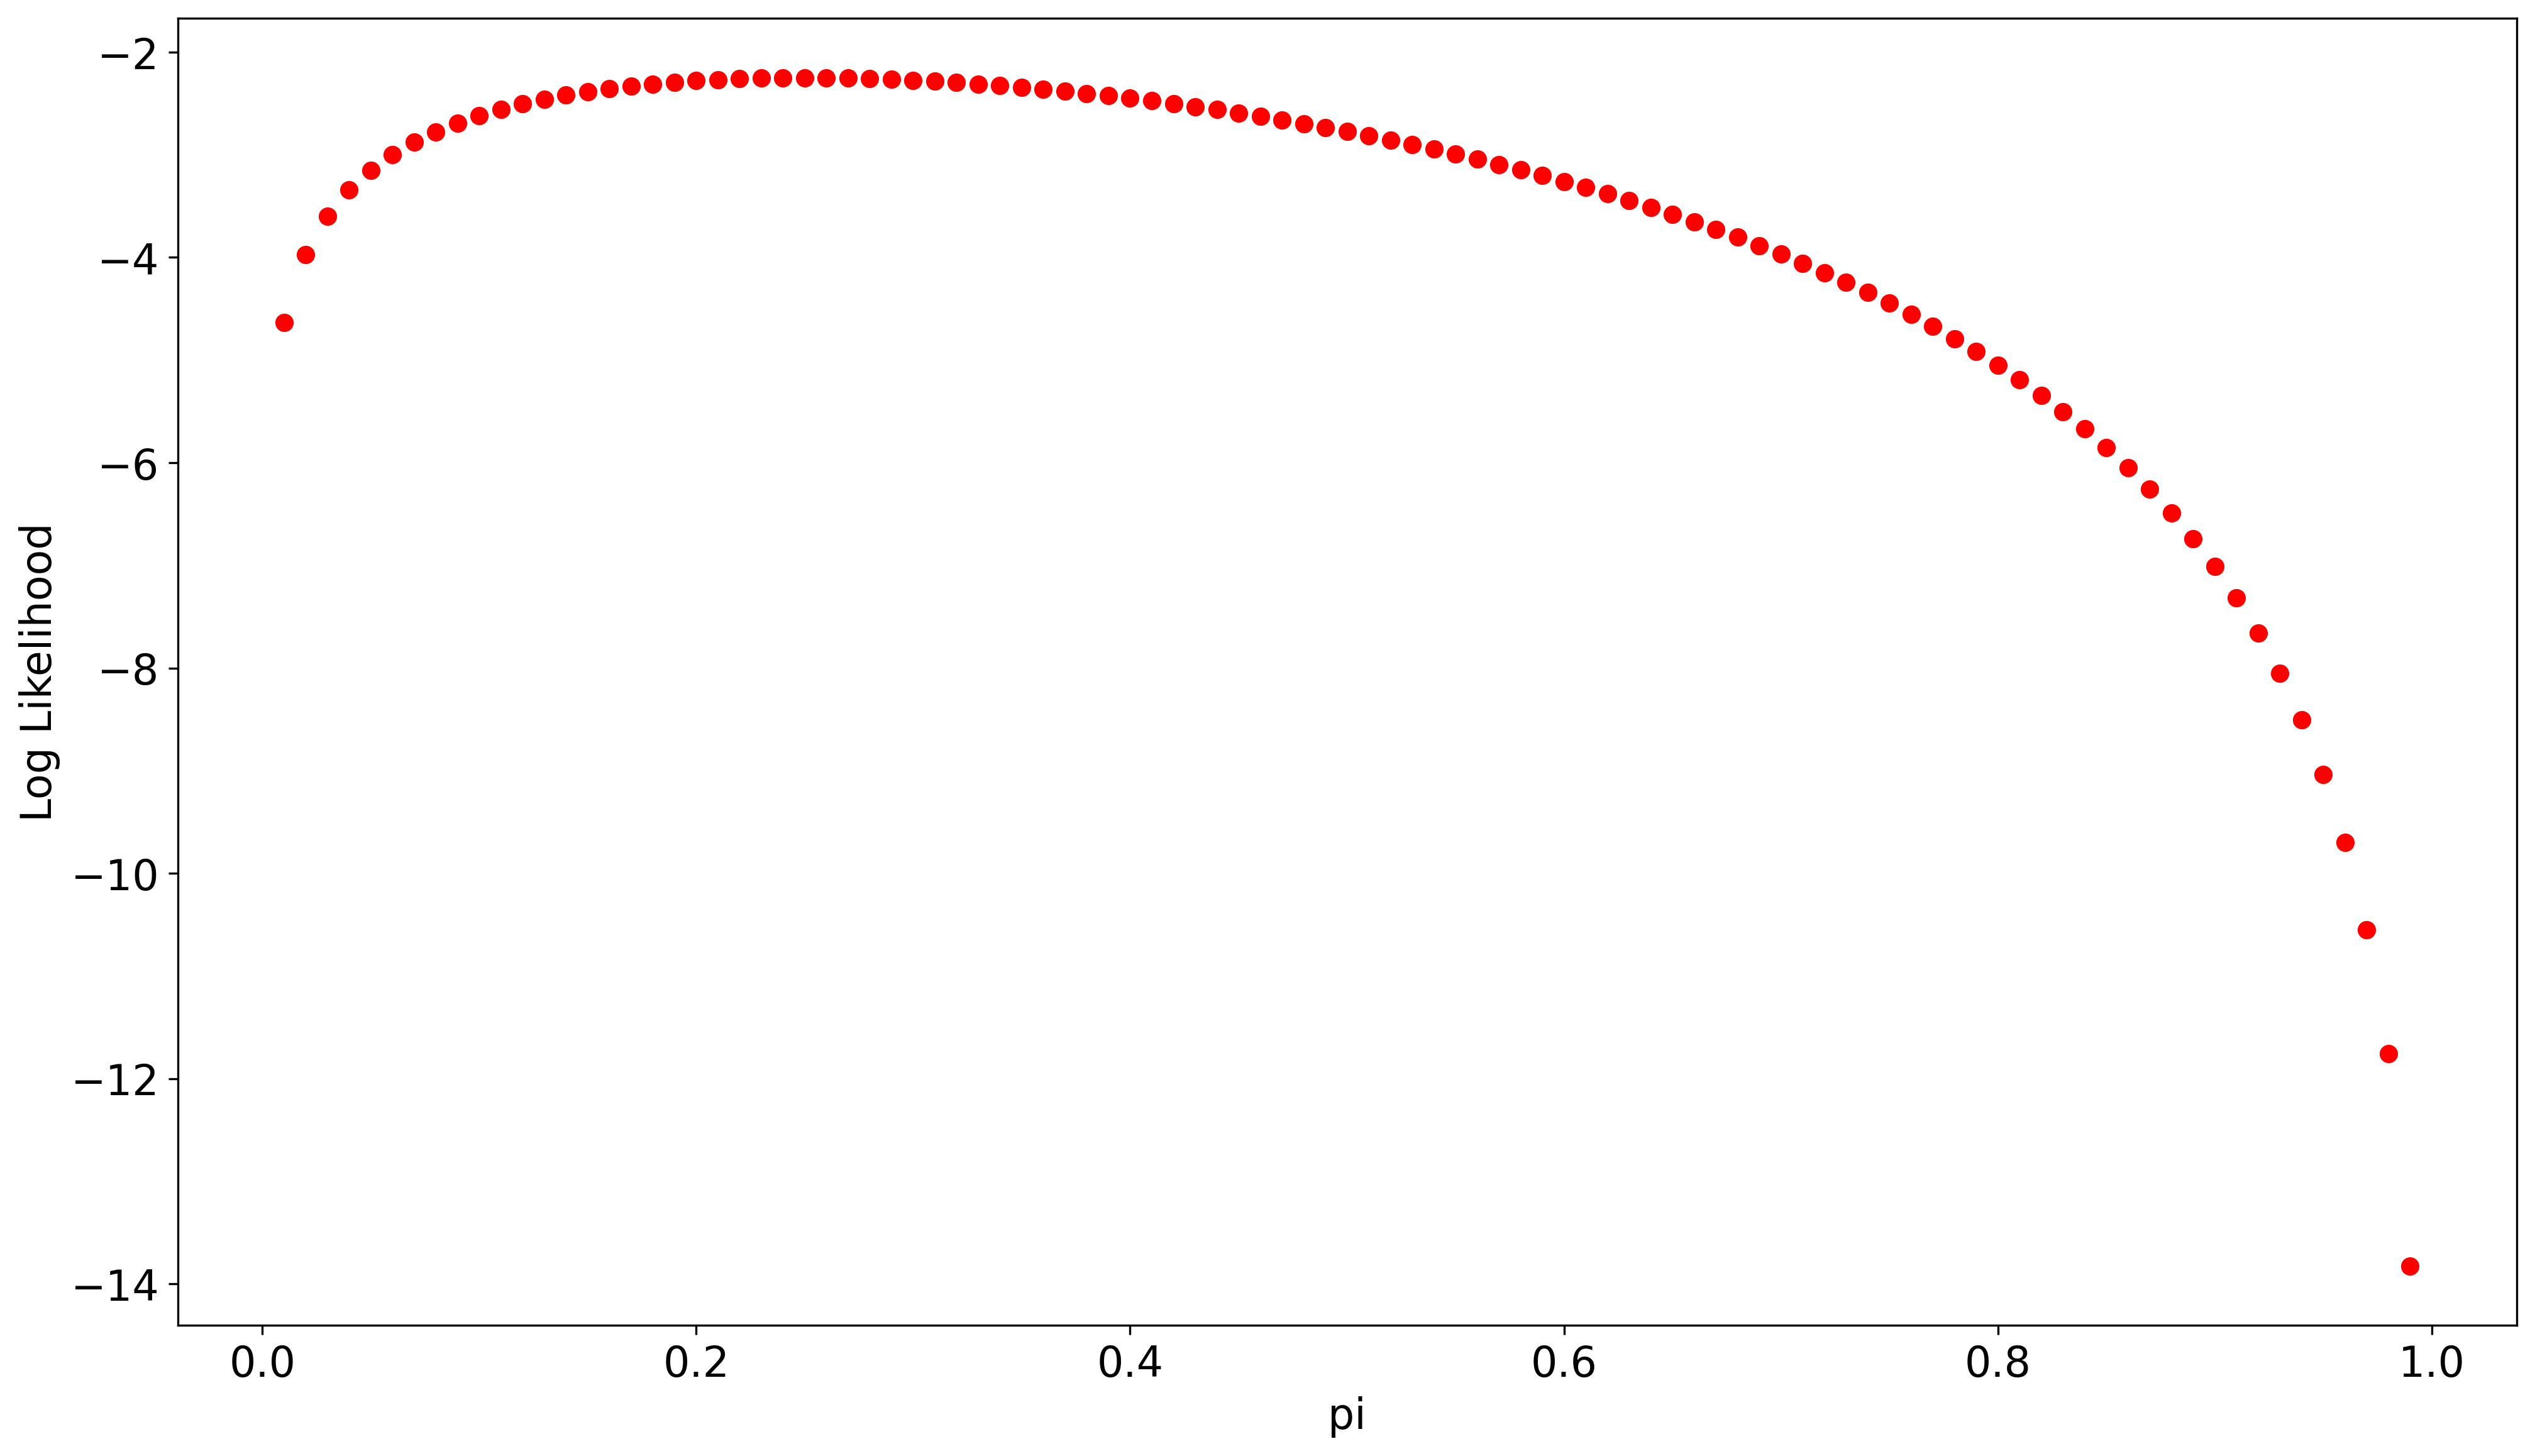

In [7]:
for pi_s in range(1, 100, 1):
    loglike_pi = fun_loglike1(d = d, pi = pi_s / 100)
    plt.xlabel('pi')
    plt.ylabel('Log Likelihood')
    plt.plot(pi_s / 100, loglike_pi, color='red', marker='o')

We can see that the Log Likelihood is maximal when pi = 1/4 = 25%. How can we define when the Log Likelihood is more complicated. Use `scipy`'s solver:

In [11]:
# since scipy.optimize can only minimize, we calculate the negative log-likelihood
def fun_loglike2(d, pi):
    '''
    Calculate the negative log likelihood of default data d with default rate pi
    Input:
    - d: default data array;
    - pi: default rate of the data
    '''
    loglike_indiv = d * np.log(pi) + (1-d) * (np.log(1-pi))
    neg_loglike= - np.sum(loglike_indiv)

    return neg_loglike

start = 0.1
minimize(lambda pi_fun: fun_loglike2(d = d, pi = pi_fun), start, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 2.249341
         Iterations: 15
         Function evaluations: 30


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2.249340578475233
             x: [ 2.500e-01]
           nit: 15
          nfev: 30
 final_simplex: (array([[ 2.500e-01],
                       [ 2.501e-01]]), array([ 2.249e+00,  2.249e+00]))

We want further model (or wrap) the default probability as **a function of features**, we can write the PD of `$pi$` as a function of explanatory variable `xi` (let's say the relationship is just **linear**, with intercept).

We often use a Logit transformation (logarithm of odd ratio) or Probit transformation (reverse of cumulative distribution function of ND) to yield the PD into range [0, 1].

logL: beta:
-3.51 -0.01
-3.29 -0.009
-3.08 -0.008
-2.9 -0.007
-2.74 -0.006
-2.62 -0.005
-2.53 -0.004
-2.5 -0.003
-2.52 -0.002
-2.61 -0.001
-2.77 0.0
-3.01 0.001
-3.32 0.002
-3.7 0.003
-4.13 0.004
-4.62 0.005
-5.14 0.006
-5.7 0.007
-6.28 0.008
-6.89 0.009


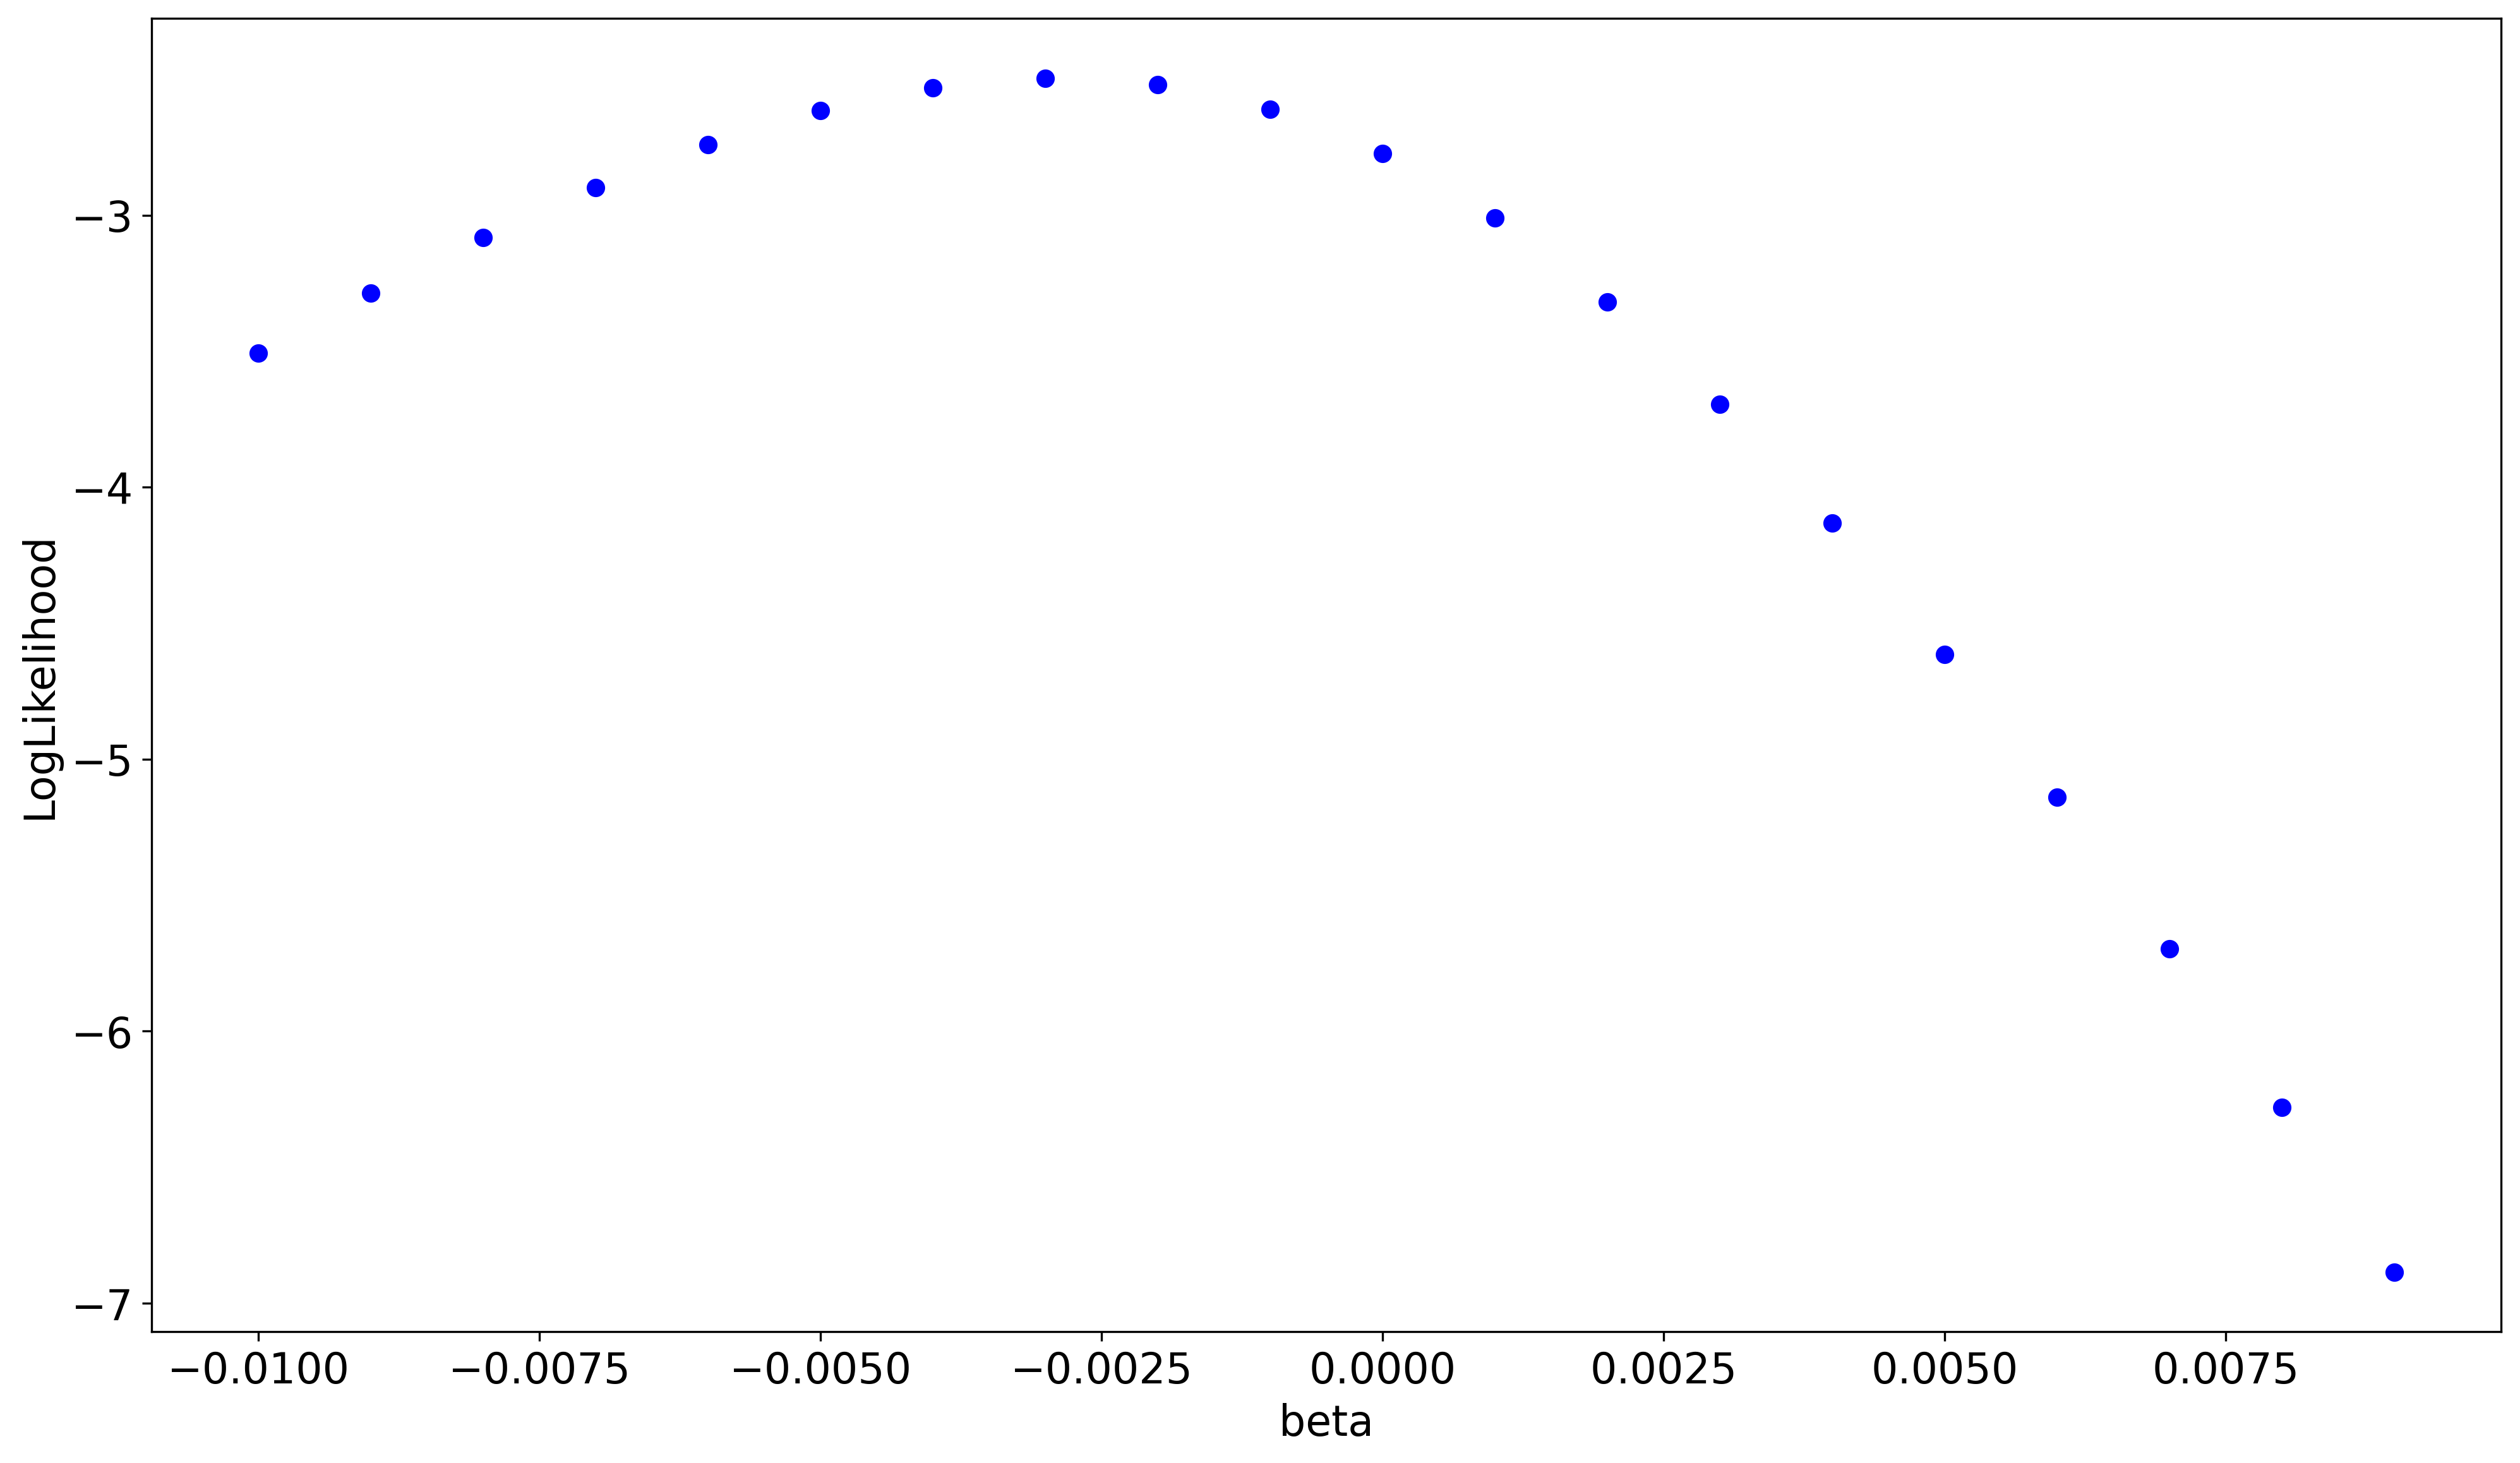

In [12]:
# let's change the data a little bit with higher default rate
d = np.array([0, 0, 1, 1])
x = np.array([400, 300, 200, 100])

# assume the intercept = 0 and we have only 1 variable x, we need to estimate the beta of that x
def fun_loglike3(beta):
    ''' Calculate the log likelihood given beta on the outcome d and explained variable x'''
    pd_pred = np.exp(beta * x) / (1 + np.exp(beta * x) )
    loglike_indiv = d * np.log(pd_pred) + (1-d) * (np.log(1-pd_pred))
    loglike = np.sum(loglike_indiv)
    return loglike

print('logL:', 'beta:')
for beta_s in range(-10, 10, 1):
    loglike_beta = fun_loglike3(beta_s/1000)
    plt.xlabel('beta')
    plt.ylabel('LogLikelihood')
    plt.plot(beta_s/1000,loglike_beta, color='blue', marker='o')
    print(np.round(loglike_beta,2), np.round(beta_s/1000,3))

We see the log likelihood is maximum when beta = -0.003. We can start to inference:

In [13]:
beta_opt = -0.003

print('Linear predictor:',beta_opt * x)
# Logit transformation
print('PDs:',np.round(np.exp(beta_opt * x) / (1+ np.exp(beta_opt * x) ),2))

Linear predictor: [-1.2 -0.9 -0.6 -0.3]
PDs: [0.23 0.29 0.35 0.43]


Similarly we can let the machine to optimize this function:

In [14]:
def fun_loglike4(beta):
    ''' Calculate the log likelihood given beta on the outcome d and explained variable x'''
    pd_pred = np.exp(beta * x) / (1 + np.exp(beta * x))
    loglike_indiv = d * np.log(pd_pred) + (1-d) * (np.log(1-pd_pred))
    neg_loglike = - np.sum(loglike_indiv)
    return neg_loglike

start = 0
minimize(fun_loglike4, start, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 2.495831
         Iterations: 9
         Function evaluations: 18


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2.495831135080063
             x: [-2.875e-03]
           nit: 9
          nfev: 18
 final_simplex: (array([[-2.875e-03],
                       [-2.906e-03]]), array([ 2.496e+00,  2.496e+00]))

No need to code the log-likelihood yourself, already have standard packages for eg `statsmodels` which only requires data preparation as `numpy` arrays or `pandas` dataframes. For eg:

In [15]:
model_logit = sm.Logit(d, x)

results_logit = model_logit.fit()
print(results_logit.summary())

Optimization terminated successfully.
         Current function value: 0.623958
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                    4
Model:                          Logit   Df Residuals:                        3
Method:                           MLE   Df Model:                            0
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                 0.09982
Time:                        16:00:10   Log-Likelihood:                -2.4958
converged:                       True   LL-Null:                       -2.7726
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0029      0.004     -0.703      0.482      -0.011       0.005


##### Practical Implementation

Now let's try the Logit model with our mortgage data.

In [16]:
# Delete missing values
data = data.dropna(subset=['time', 'default_time', 'FICO_orig_time'])

# default data
d = data['default_time']

# log likelihood function
def fun_loglike5(pi):
    ''' Calculate the negative log likelihood given beta on the outcome d'''
    loglike_ind = d*np.log(pi) + (1 - d)*np.log(1 - pi)
    loglike_sum = - np.sum(loglike_ind)
    return loglike_sum

# optimizing
start = 0.05
minimize(fun_loglike5, start, method = 'Nelder-Mead', options={'disp': True})

Optimization terminated successfully.
         Current function value: 7160.854301
         Iterations: 14
         Function evaluations: 28


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 7160.854301329751
             x: [ 2.452e-02]
           nit: 14
          nfev: 28
 final_simplex: (array([[ 2.452e-02],
                       [ 2.453e-02]]), array([ 7.161e+03,  7.161e+03]))

The optimum is approximately equal to the observed default rate. Now including the FICO score as a variable, we can also use a built-in approach like `statsmodels`.

In [17]:
# add a constant for the intercept
x = sm.add_constant(data['FICO_orig_time'], prepend=True)

# define model
model_logit = sm.Logit(d, x)

# fit the model
results_logit = model_logit.fit()

print(results_logit.summary())

Optimization terminated successfully.
         Current function value: 0.113822
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           default_time   No. Observations:                62178
Model:                          Logit   Df Residuals:                    62176
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Oct 2024   Pseudo R-squ.:                 0.01168
Time:                        16:09:37   Log-Likelihood:                -7077.2
converged:                       True   LL-Null:                       -7160.9
Covariance Type:            nonrobust   LLR p-value:                 2.992e-38
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.6743      0.229     -2.950      0.003      -1.122      -0.226
FICO_orig_time   

### Bayesian approaches

- Not assume that parameters are fixed, but random variables. For eg, the PD;
- This (assuming PD is random) is called **Prior**;
- Next we complement this Prior with sample data;
- From then, we derive the **Posterior** probability distribution for the unknow params.

Bayesian modelers:
- Obtain point estimates for parameters as minimums of specific loss functions;
- Compute credible intervals directly from the posterior distribution;
- Compare different models via marginal likelihoods.

Frequentist modelers:
- Derive parameter estimators claiming criteria such as unbiasedness or consistency;
- Construct confidence intervals and compute p-values.

##### Distributions

Prior: `f(pi)`
Posterior: `f(pi | d)`
Likelihood: `f(d | x)`

We say:

**`f(pi | d)`** (conditional) posterior distribution of the PD parameter `pi` given realized default data `d`

= 

**`f(d | x)`** likelihood

*

**`f(pi)`** prior distribution of the PD parameter

/

**`f(d)`** unconditional distribution of the data.


- **Prior** can contain other params like expectation and variance of distribution, can be modeled as well. We call these hyper-parameters;
- is pre-specified by Bayesian modelers according to their beliefs
- **Posterior** can be evaluated analytically once we assume about **Prior** and **Likelihood**, otherwise we must use method like MCMC to simulate.

##### Paramerter Estimation

- Considering a loss function specifies the loss incurred by using the estimated `pi` instead of the true `pi`, we can estimate the best set of parameters by minimizing the loss function. Common loss functions are absolute value loss or Quadratic loss function;
- Optimiztion is done by differentiating with respected to `pi`, and solving the equation;
- For obtaining a credible interval, like 95%, Bayesian modelers compute `P( xL < x < xU) = 0.95`.

##### Example for Default Modeling

- Assume the PD of a loan is not a fixed number but a random variable follow Beta distribution;
- Beta distribution have two params `a` (alpha) and `b` (beta);
- Beta distribuytion is used for describing parameters (which we assume it is not fixed but random as this PD example) for another distribution.

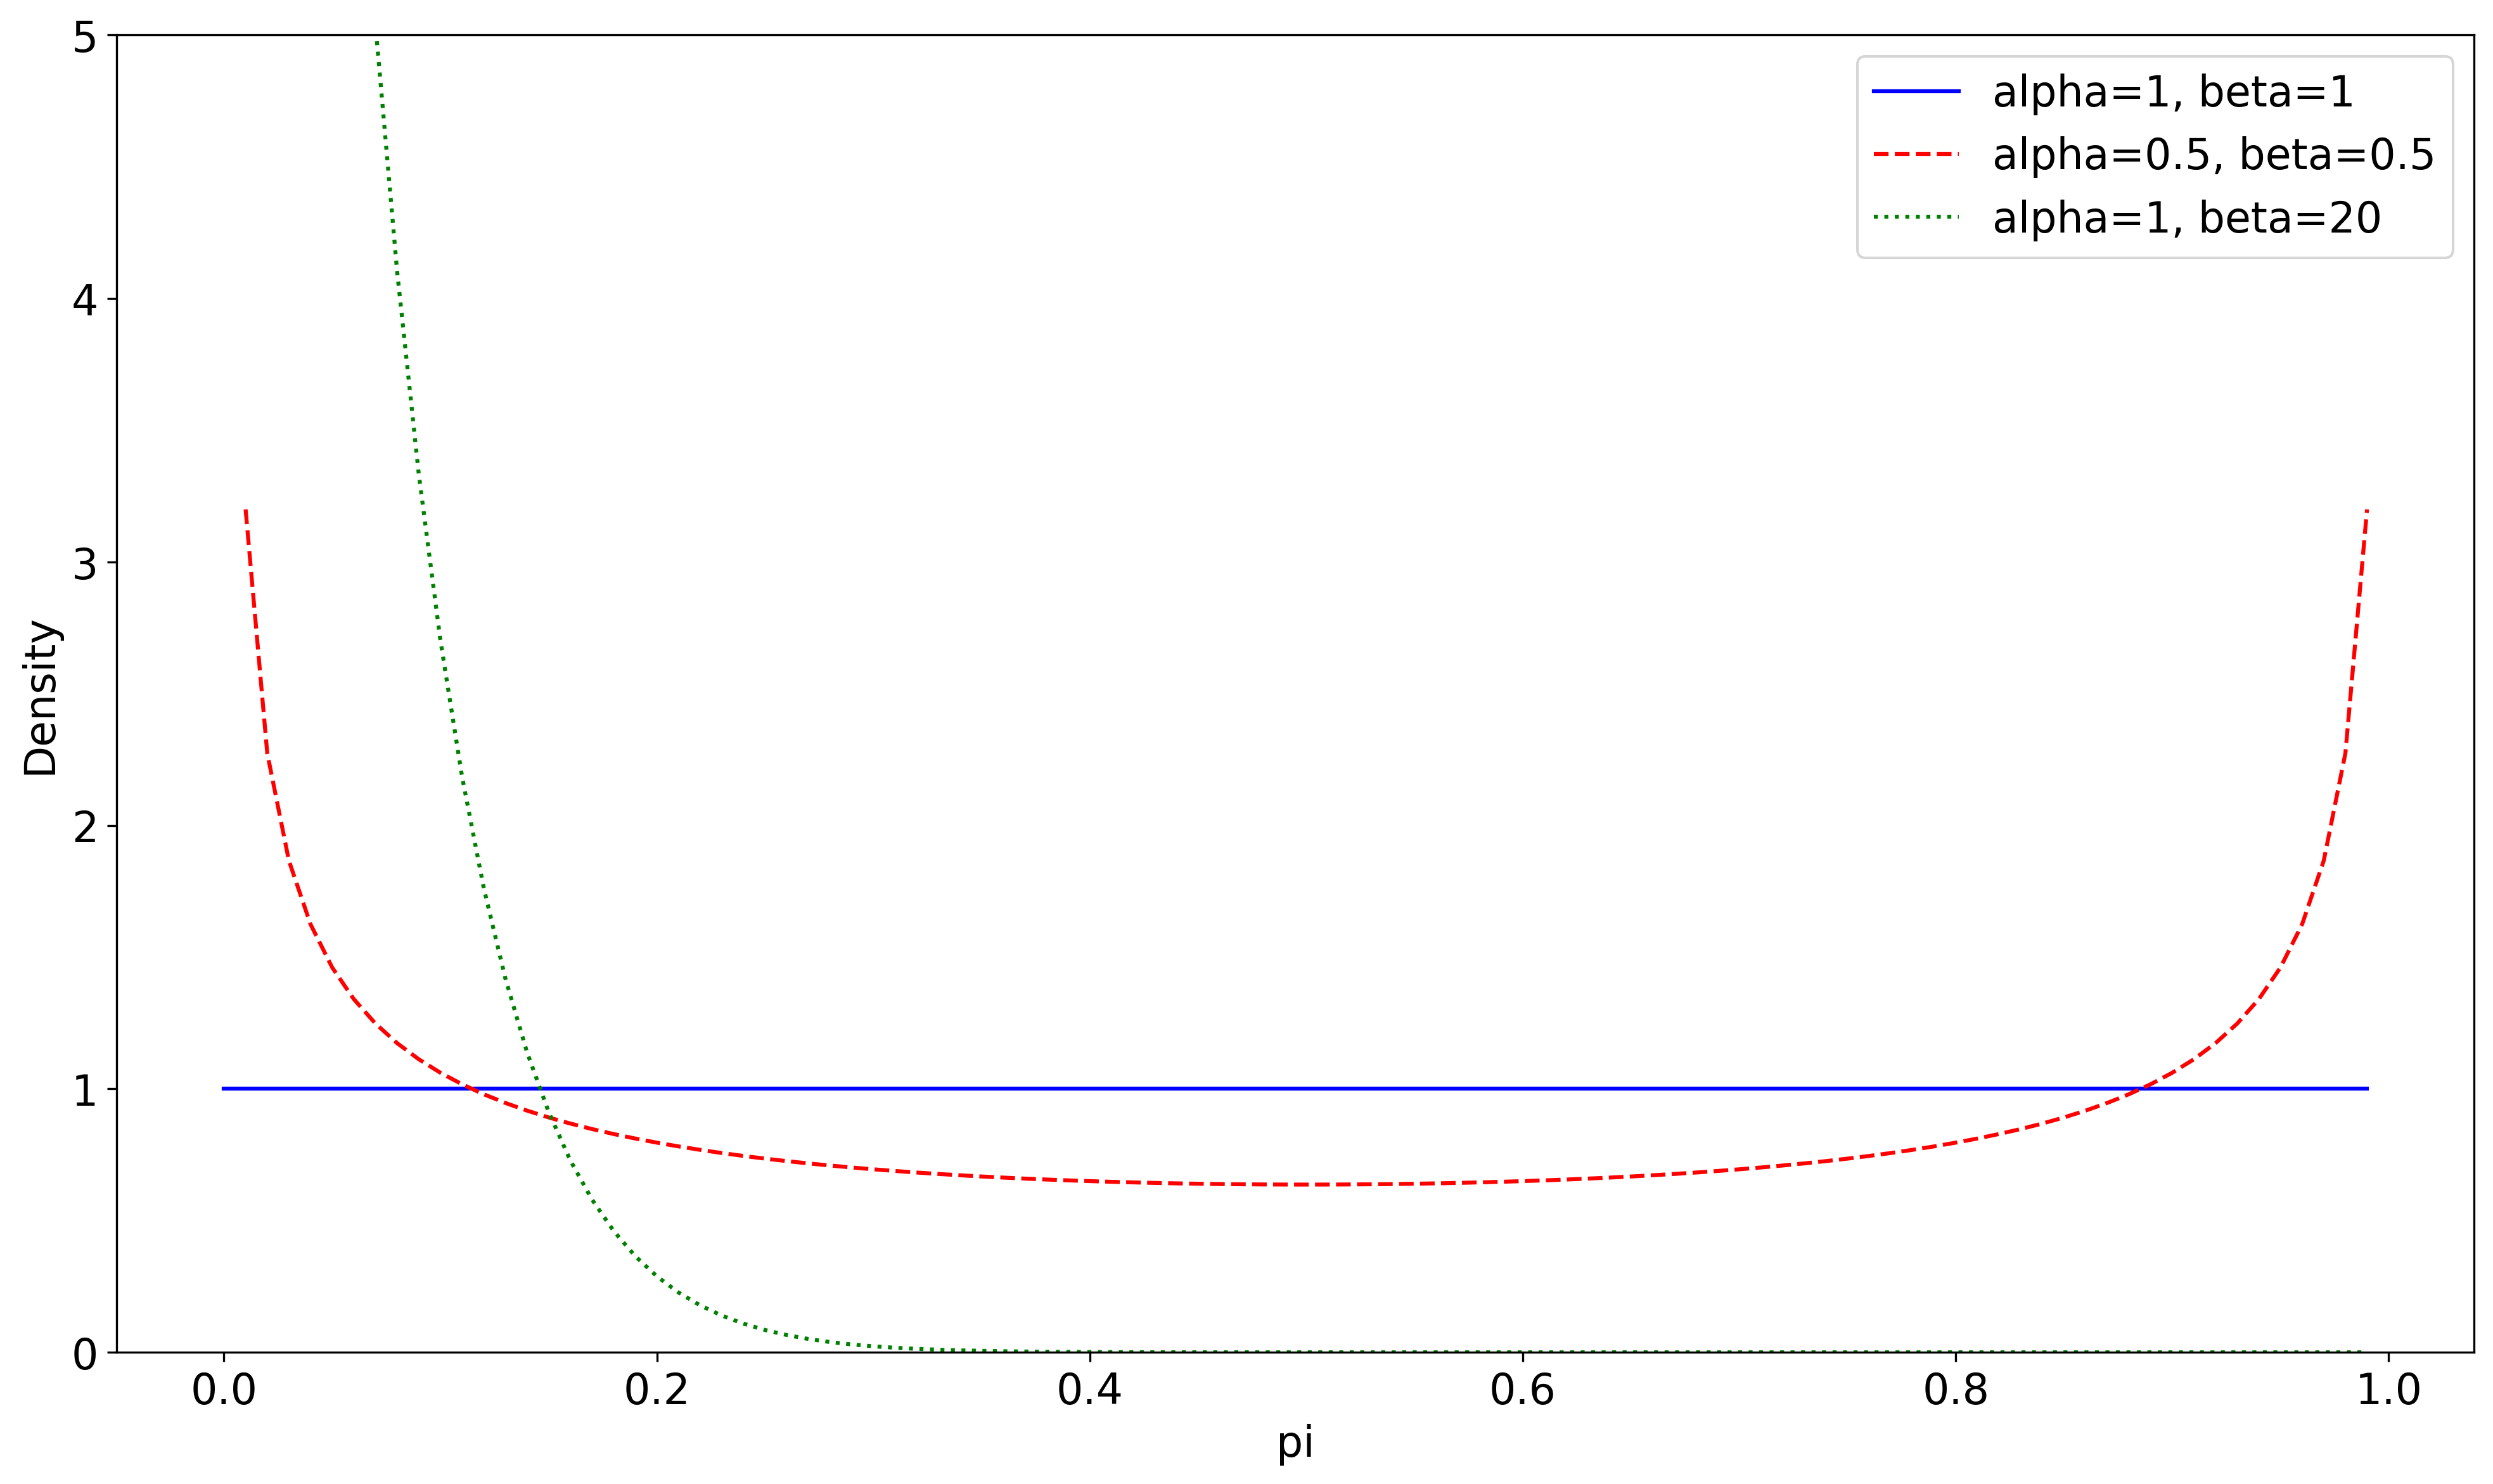

In [19]:
# base data
pi = np.arange(0, 1, 0.01)

# scipy.stats.beta
alpha1, beta1 = 1, 1
beta_pdf1 = beta.pdf(pi, alpha1, beta1)
alpha2, beta2 = 0.5, 0.5
beta_pdf2 = beta.pdf(pi, alpha2, beta2)
alpha3, beta3 = 1, 20
beta_pdf3 = beta.pdf(pi, alpha3, beta3)

plt.plot(pi, beta_pdf1, marker='', color='blue', label='alpha=1, beta=1', ls='solid')
plt.plot(pi, beta_pdf2, marker='', color='red', label='alpha=0.5, beta=0.5', ls='dashed')
plt.plot(pi, beta_pdf3, marker='', color='green', label='alpha=1, beta=20', ls='dotted')
plt.xlabel('pi')
plt.ylim(0,5)
plt.ylabel('Density')
plt.legend(loc='best')
plt.show()

The expectation of Beta distribution is `E(pi) = a / (a + b)`, then from the plot above we see that `a = 1` and `b = 20` is fit for PD modeling (E = 0.0476). Hence the **Prior density** of `pi` using Beta distribution is:

`f(pi, a, b) = (1 / B(1, 20)) * pi^0 * (1-pi)^19`

Now support we have portfolio d = (0, 0, 0, 1), 4 loans with 1 default. The likelihood function is:

`f(d | pi) = pi * (1- pi)^3`

Hence the **Posterior** is **proportional** to:

`f(d | pi) * f(pi, a, b)` = `pi * (1- pi)^3 * pi^0 * (1-pi)^19` = `pi * (1- pi)^22`

The normalizing constant of the Beta function has been absorbed by the proportionality factor, as it does not depend on `pi`. Hence the **Posterior distribution** also has the form of a Beta distribution with `a1 = a + d = 1 + 1 = 2`, and `b1 = b + n - d = 20 + 4 - 1 = 23`.The posterior is of the same distribution family as the prior, and in such a case we name it a *conjugate prior*.

This Bayesian model give the estimation for PD = 2 / (2 + 23) = 0.08, higher than the prior mean (0.0476) and lower than the default rate (0.25). Hence, we are **“mixing”** the prior assumptions and data information.

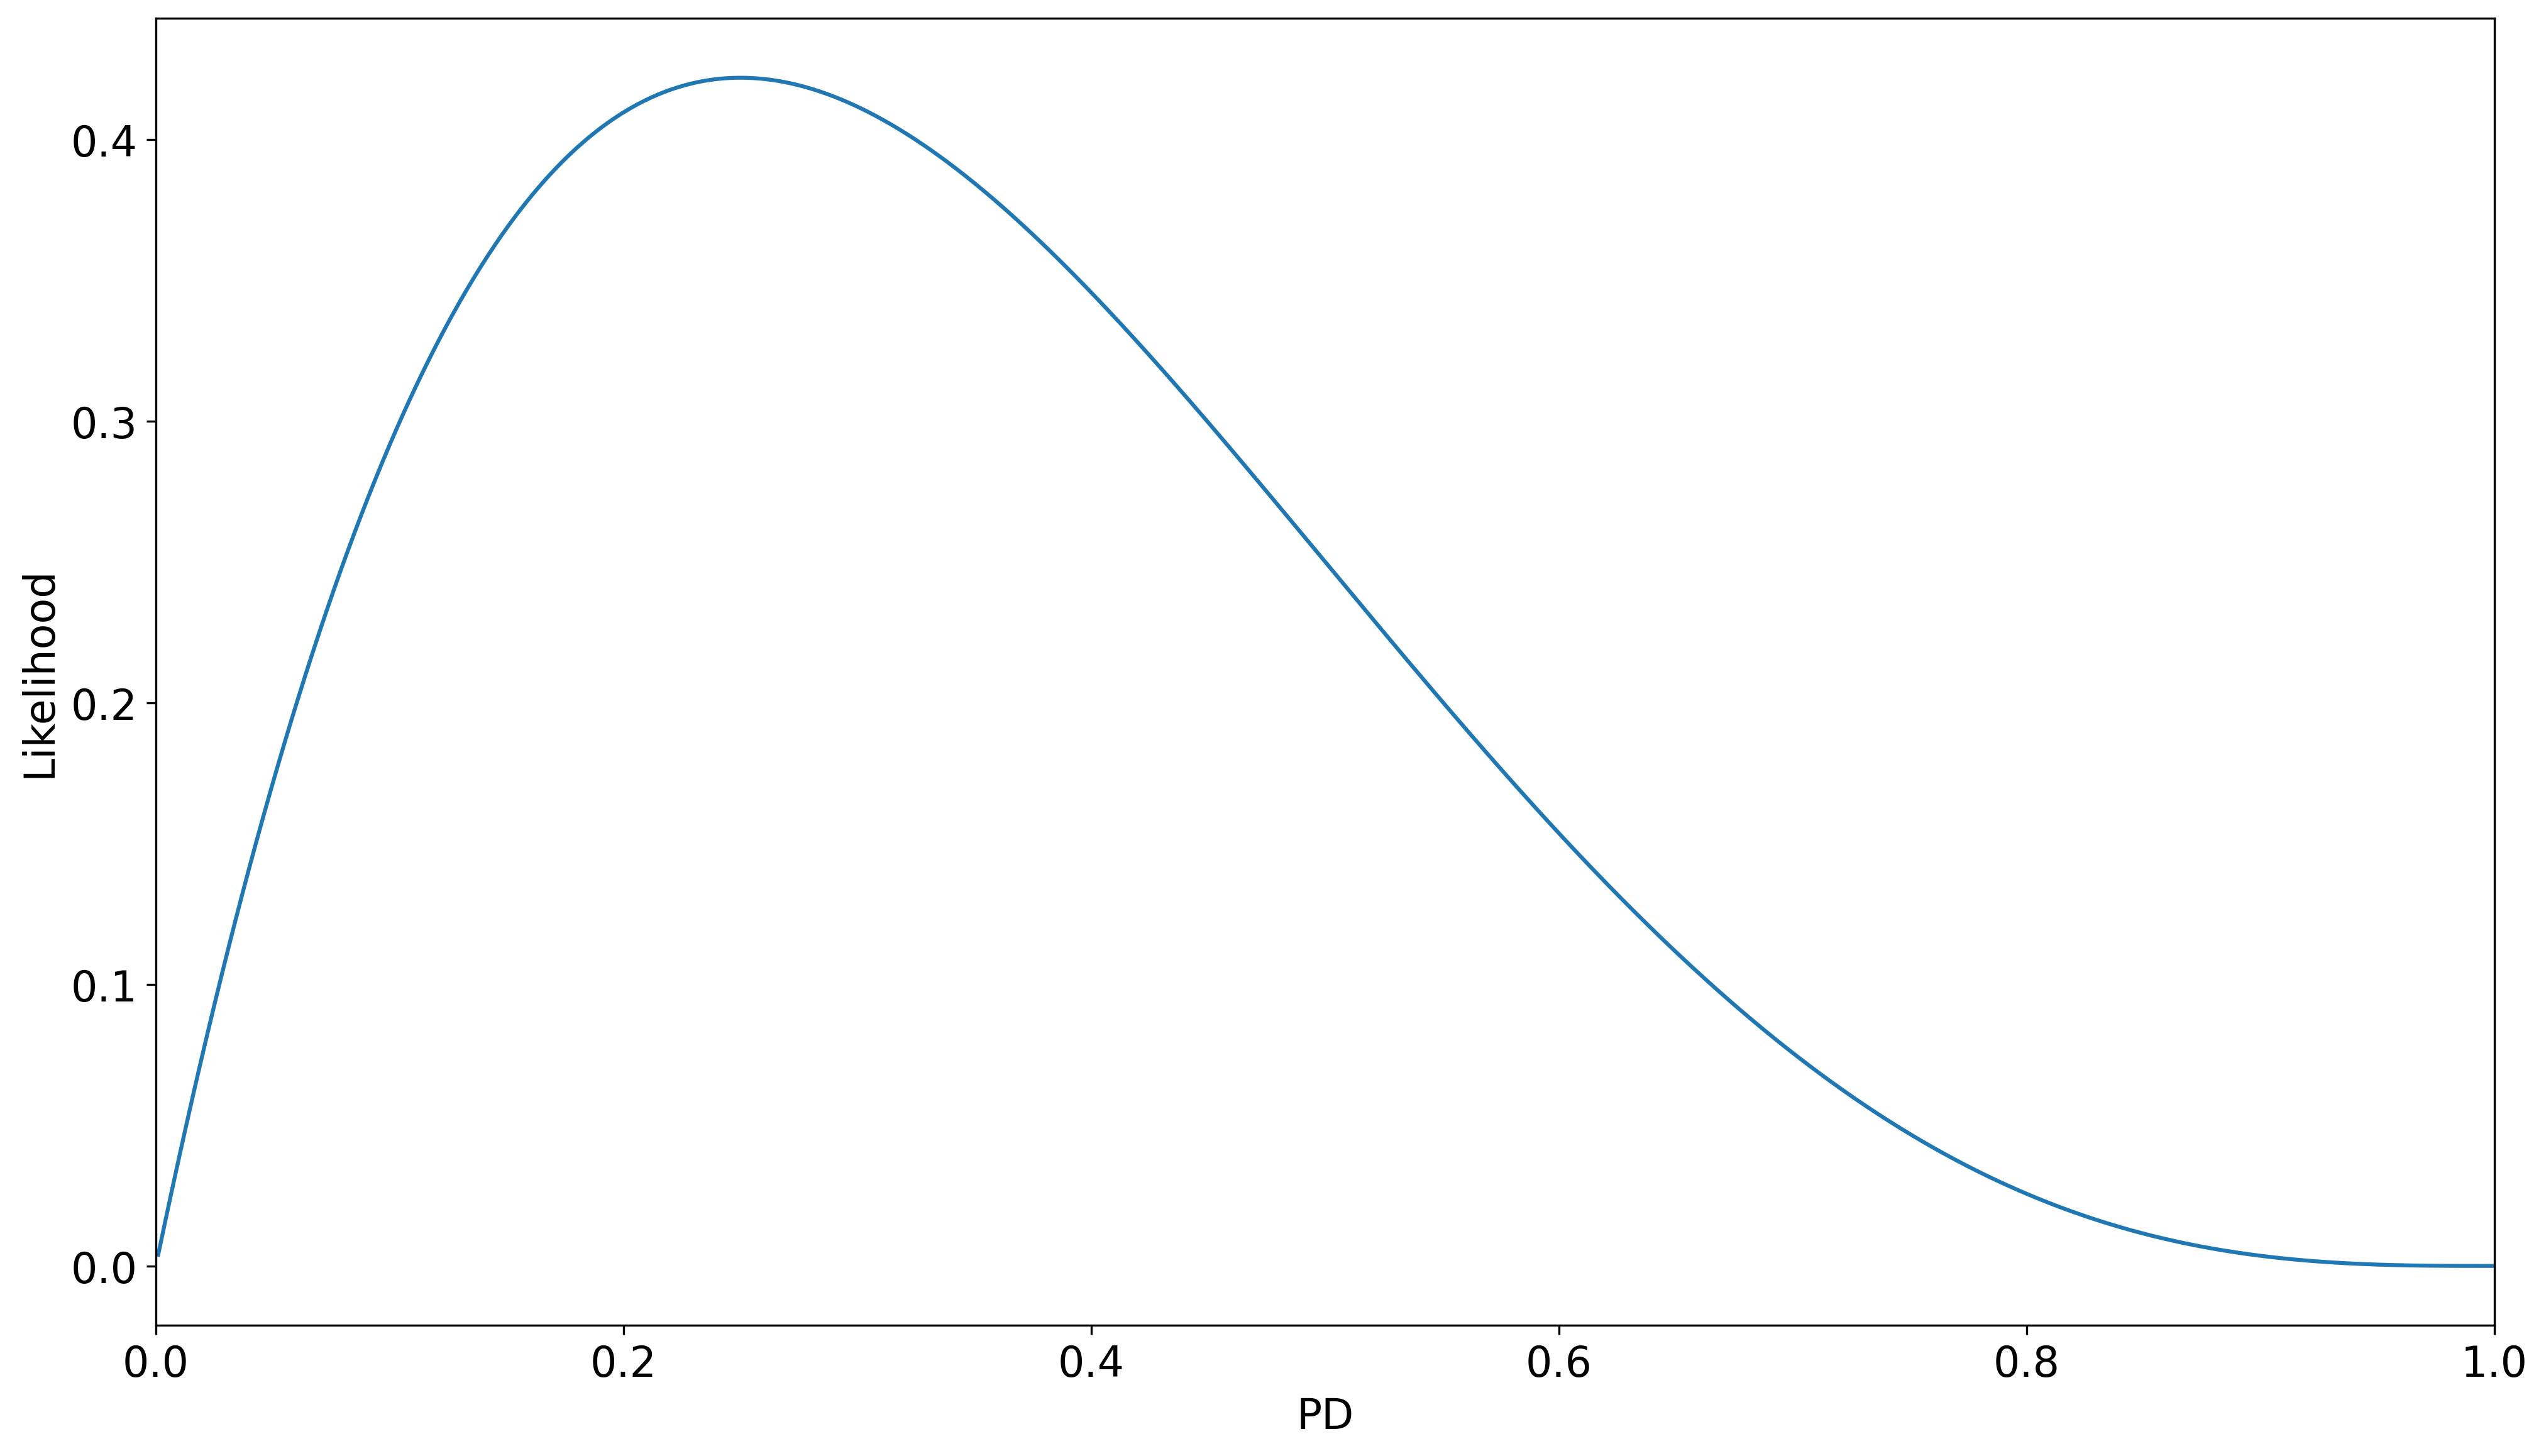

In [21]:
# the likelihood function
d = [0,0,0,1]
pi = np.arange(1,1000)/1000;
likelihood = binom.pmf(np.sum(d), n=len(d), p=pi, loc=0)
plt.plot(pi, likelihood, alpha=1, label="Likelihood")
plt.xlim(0,1)
plt.xlabel('PD')
plt.ylabel('Likelihood')
plt.show()

The high observed default rate shifts the distribution from prior to posterior to the right.

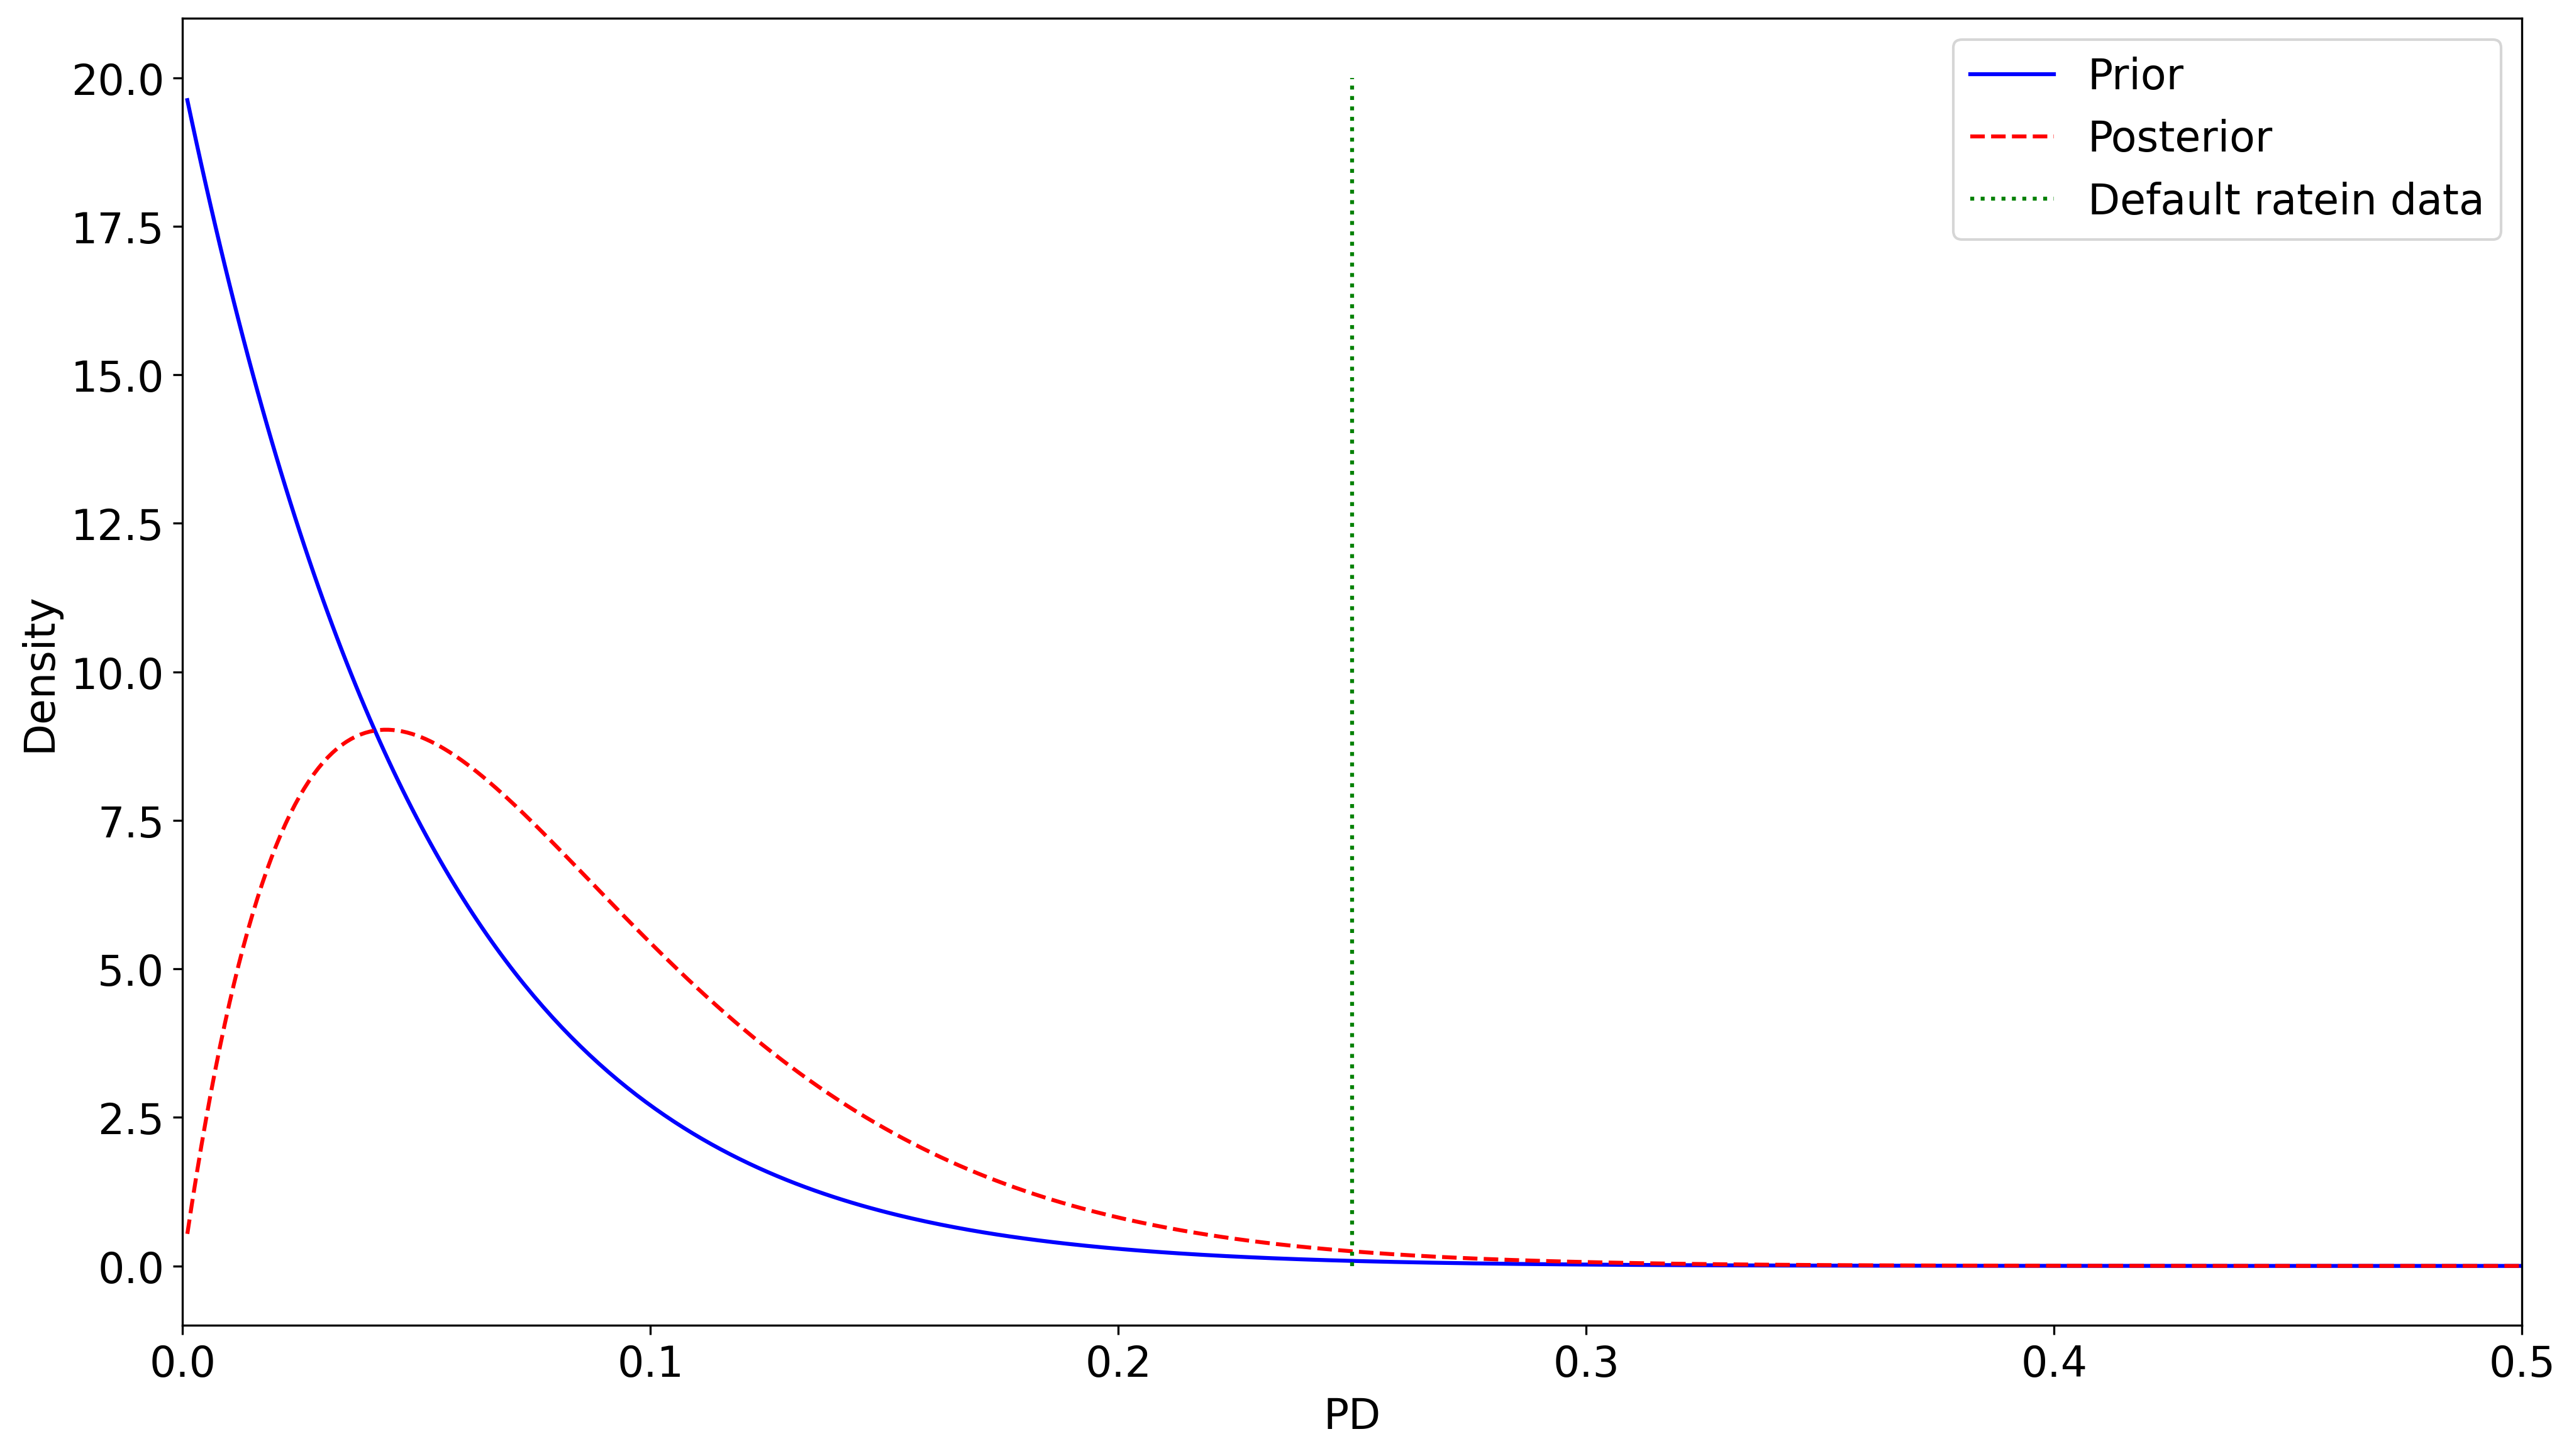

In [22]:
# prior
alpha_prior = 1
beta_prior = 20
prior = beta.pdf(pi, alpha_prior, beta_prior, loc=0, scale=1)

# posterior
alpha_post = alpha_prior + np.sum(d)
beta_post = beta_prior + len(d) - np.sum(d)
posterior = beta.pdf(pi, alpha_post, beta_post, loc=0, scale=1)

plt.plot(pi, prior, color='blue', ls='solid', label="Prior")
plt.plot(pi, posterior, color = 'red',ls='dashed', label="Posterior")
plt.plot([np.mean(d), np.mean(d)], [0, 20], color='green', ls='dotted', label='Default ratein data')
plt.xlim(0,0.5)
plt.xlabel('PD')
plt.ylabel('Density')
plt.legend(loc='best')
plt.legend()
plt.show()

##### Analytic Computation

We now apply this approach to our mortgage data

In [2]:
data_bayes = data.sample(100, random_state=12345)

Default rate: 0.06
# of defaults: 6
# of observations: 100


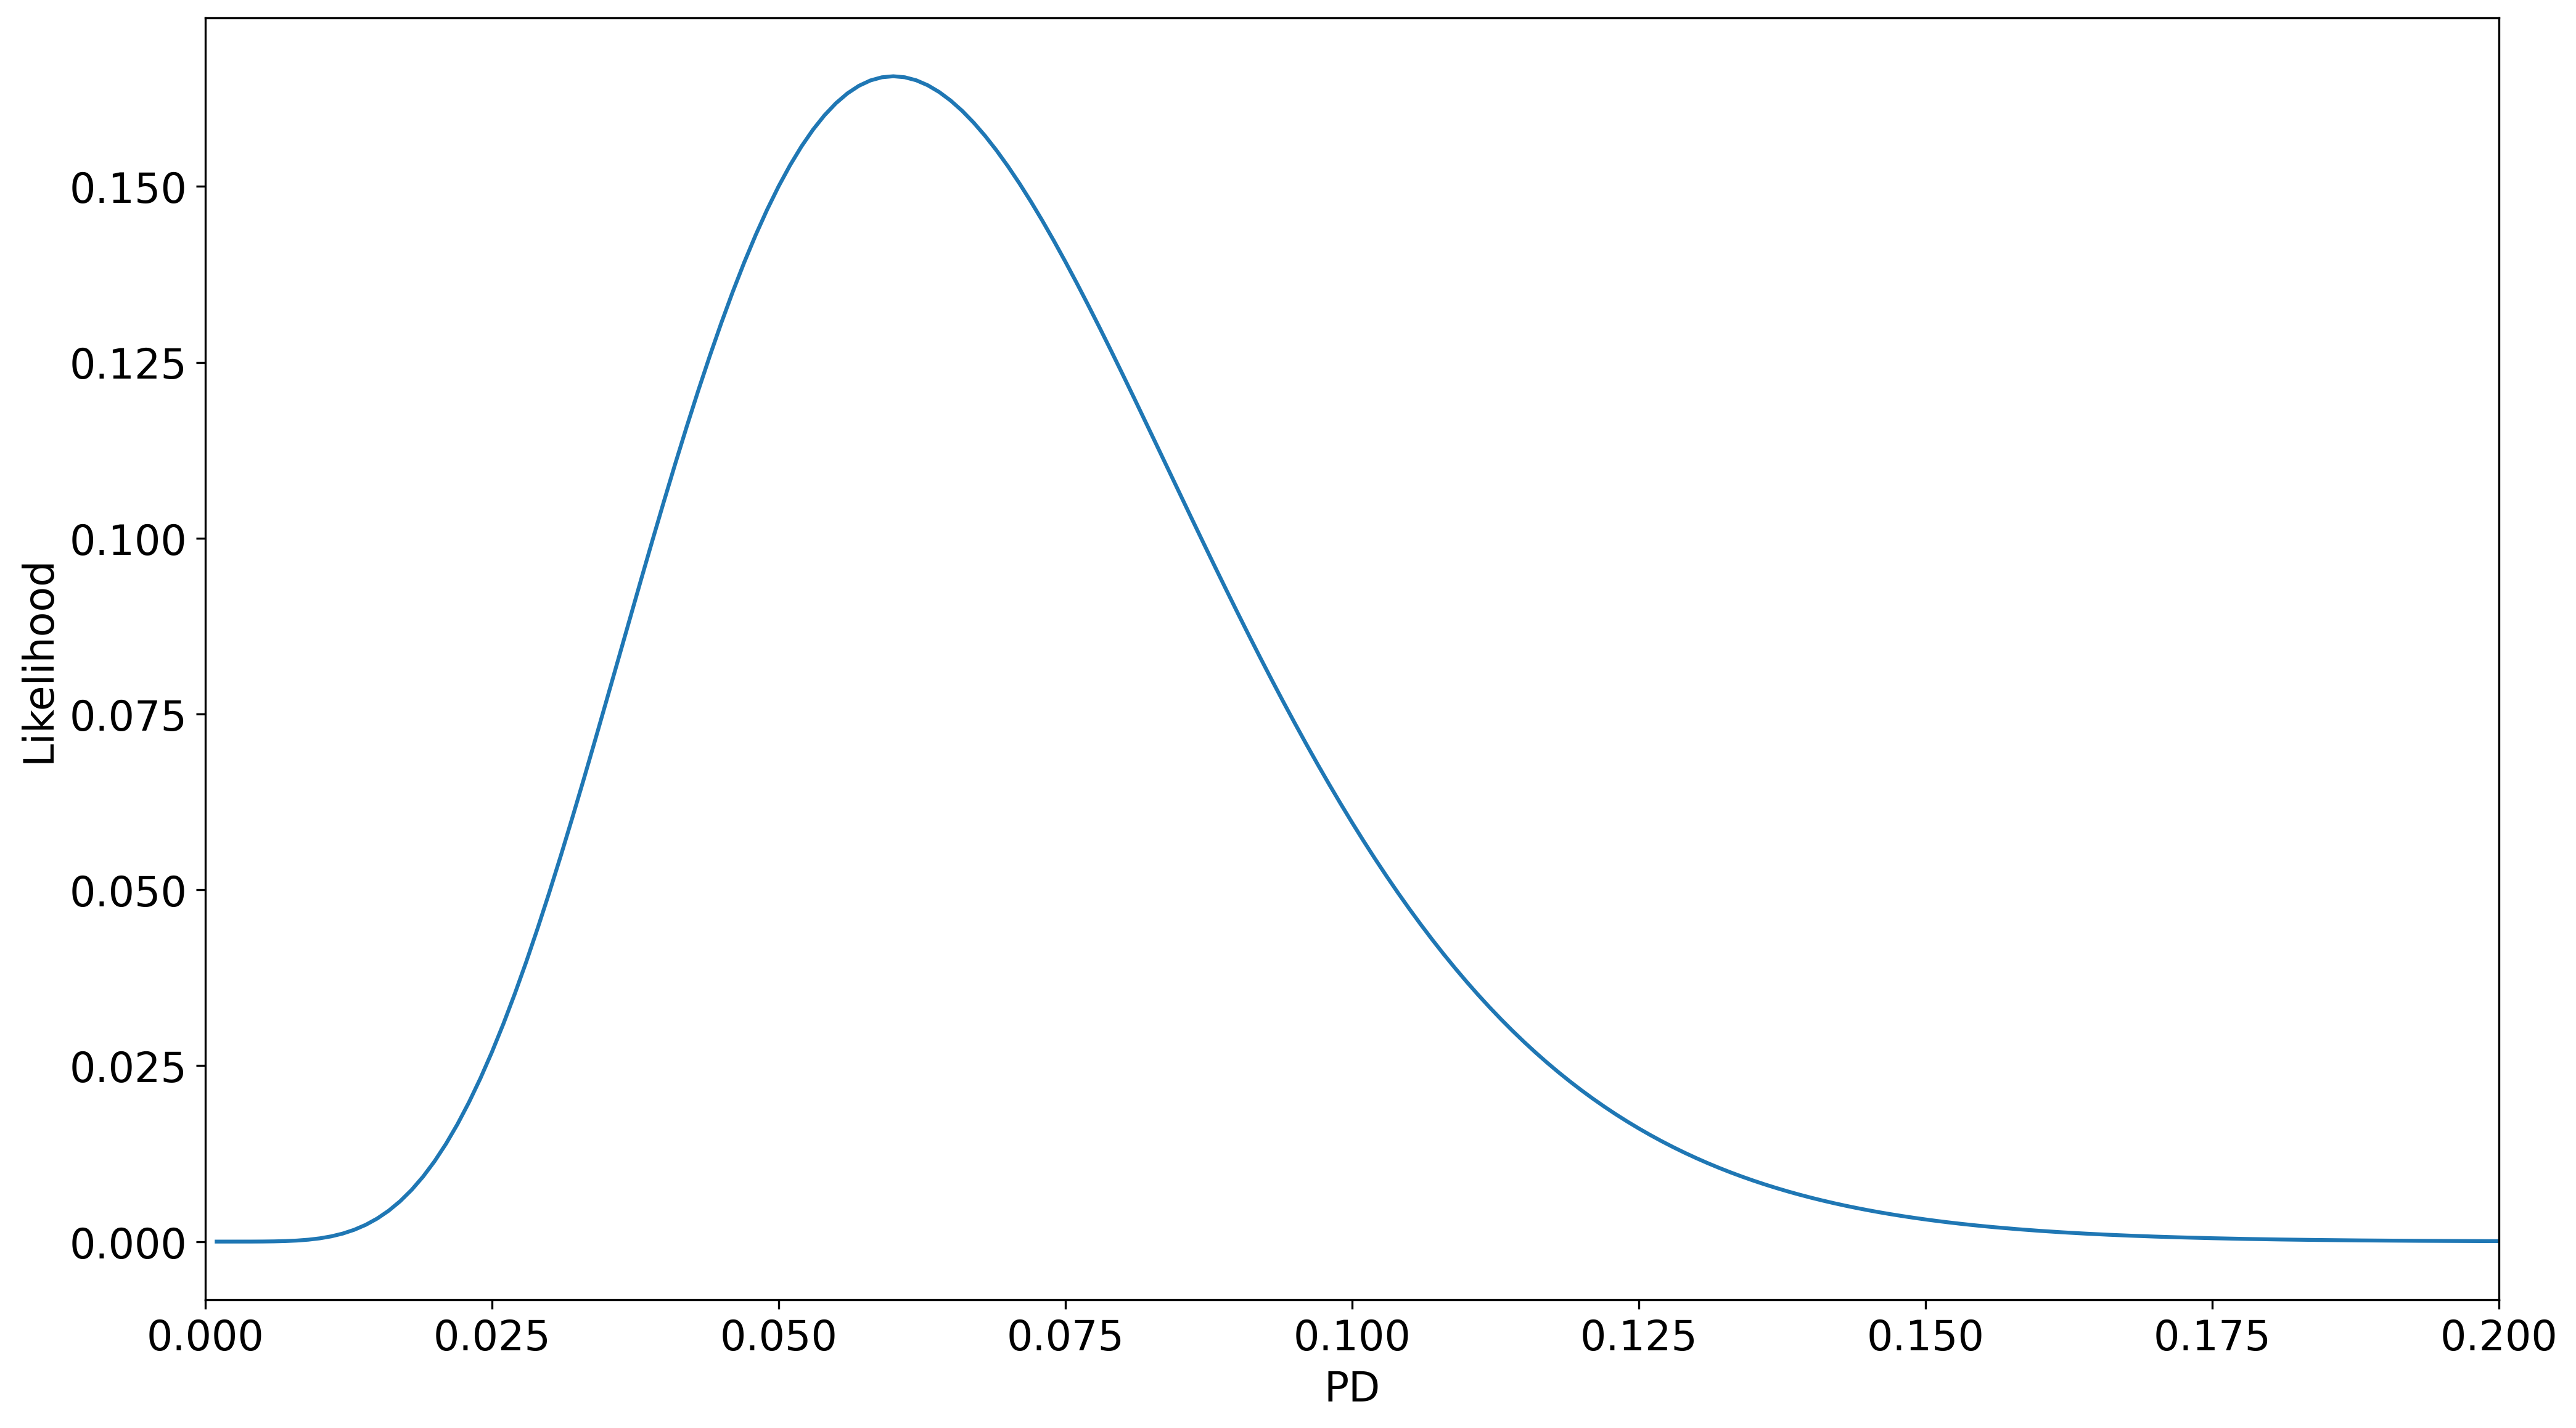

In [5]:
# out come
y = data_bayes['default_time']

print('Default rate:', np.mean(y))
print('# of defaults:', np.sum(y))
print('# of observations:', len(y))

pi = np.arange(1,1000)/1000;
likelihood = binom.pmf(np.sum(y), n=len(y), p=pi, loc=0)
plt.plot(pi, likelihood, alpha=1)
plt.xlim(0,0.2)
plt.xlabel('PD')
plt.ylabel('Likelihood')
plt.show()

alpha posterior:  7
beta posterior:  114
posterior mean:  0.0579


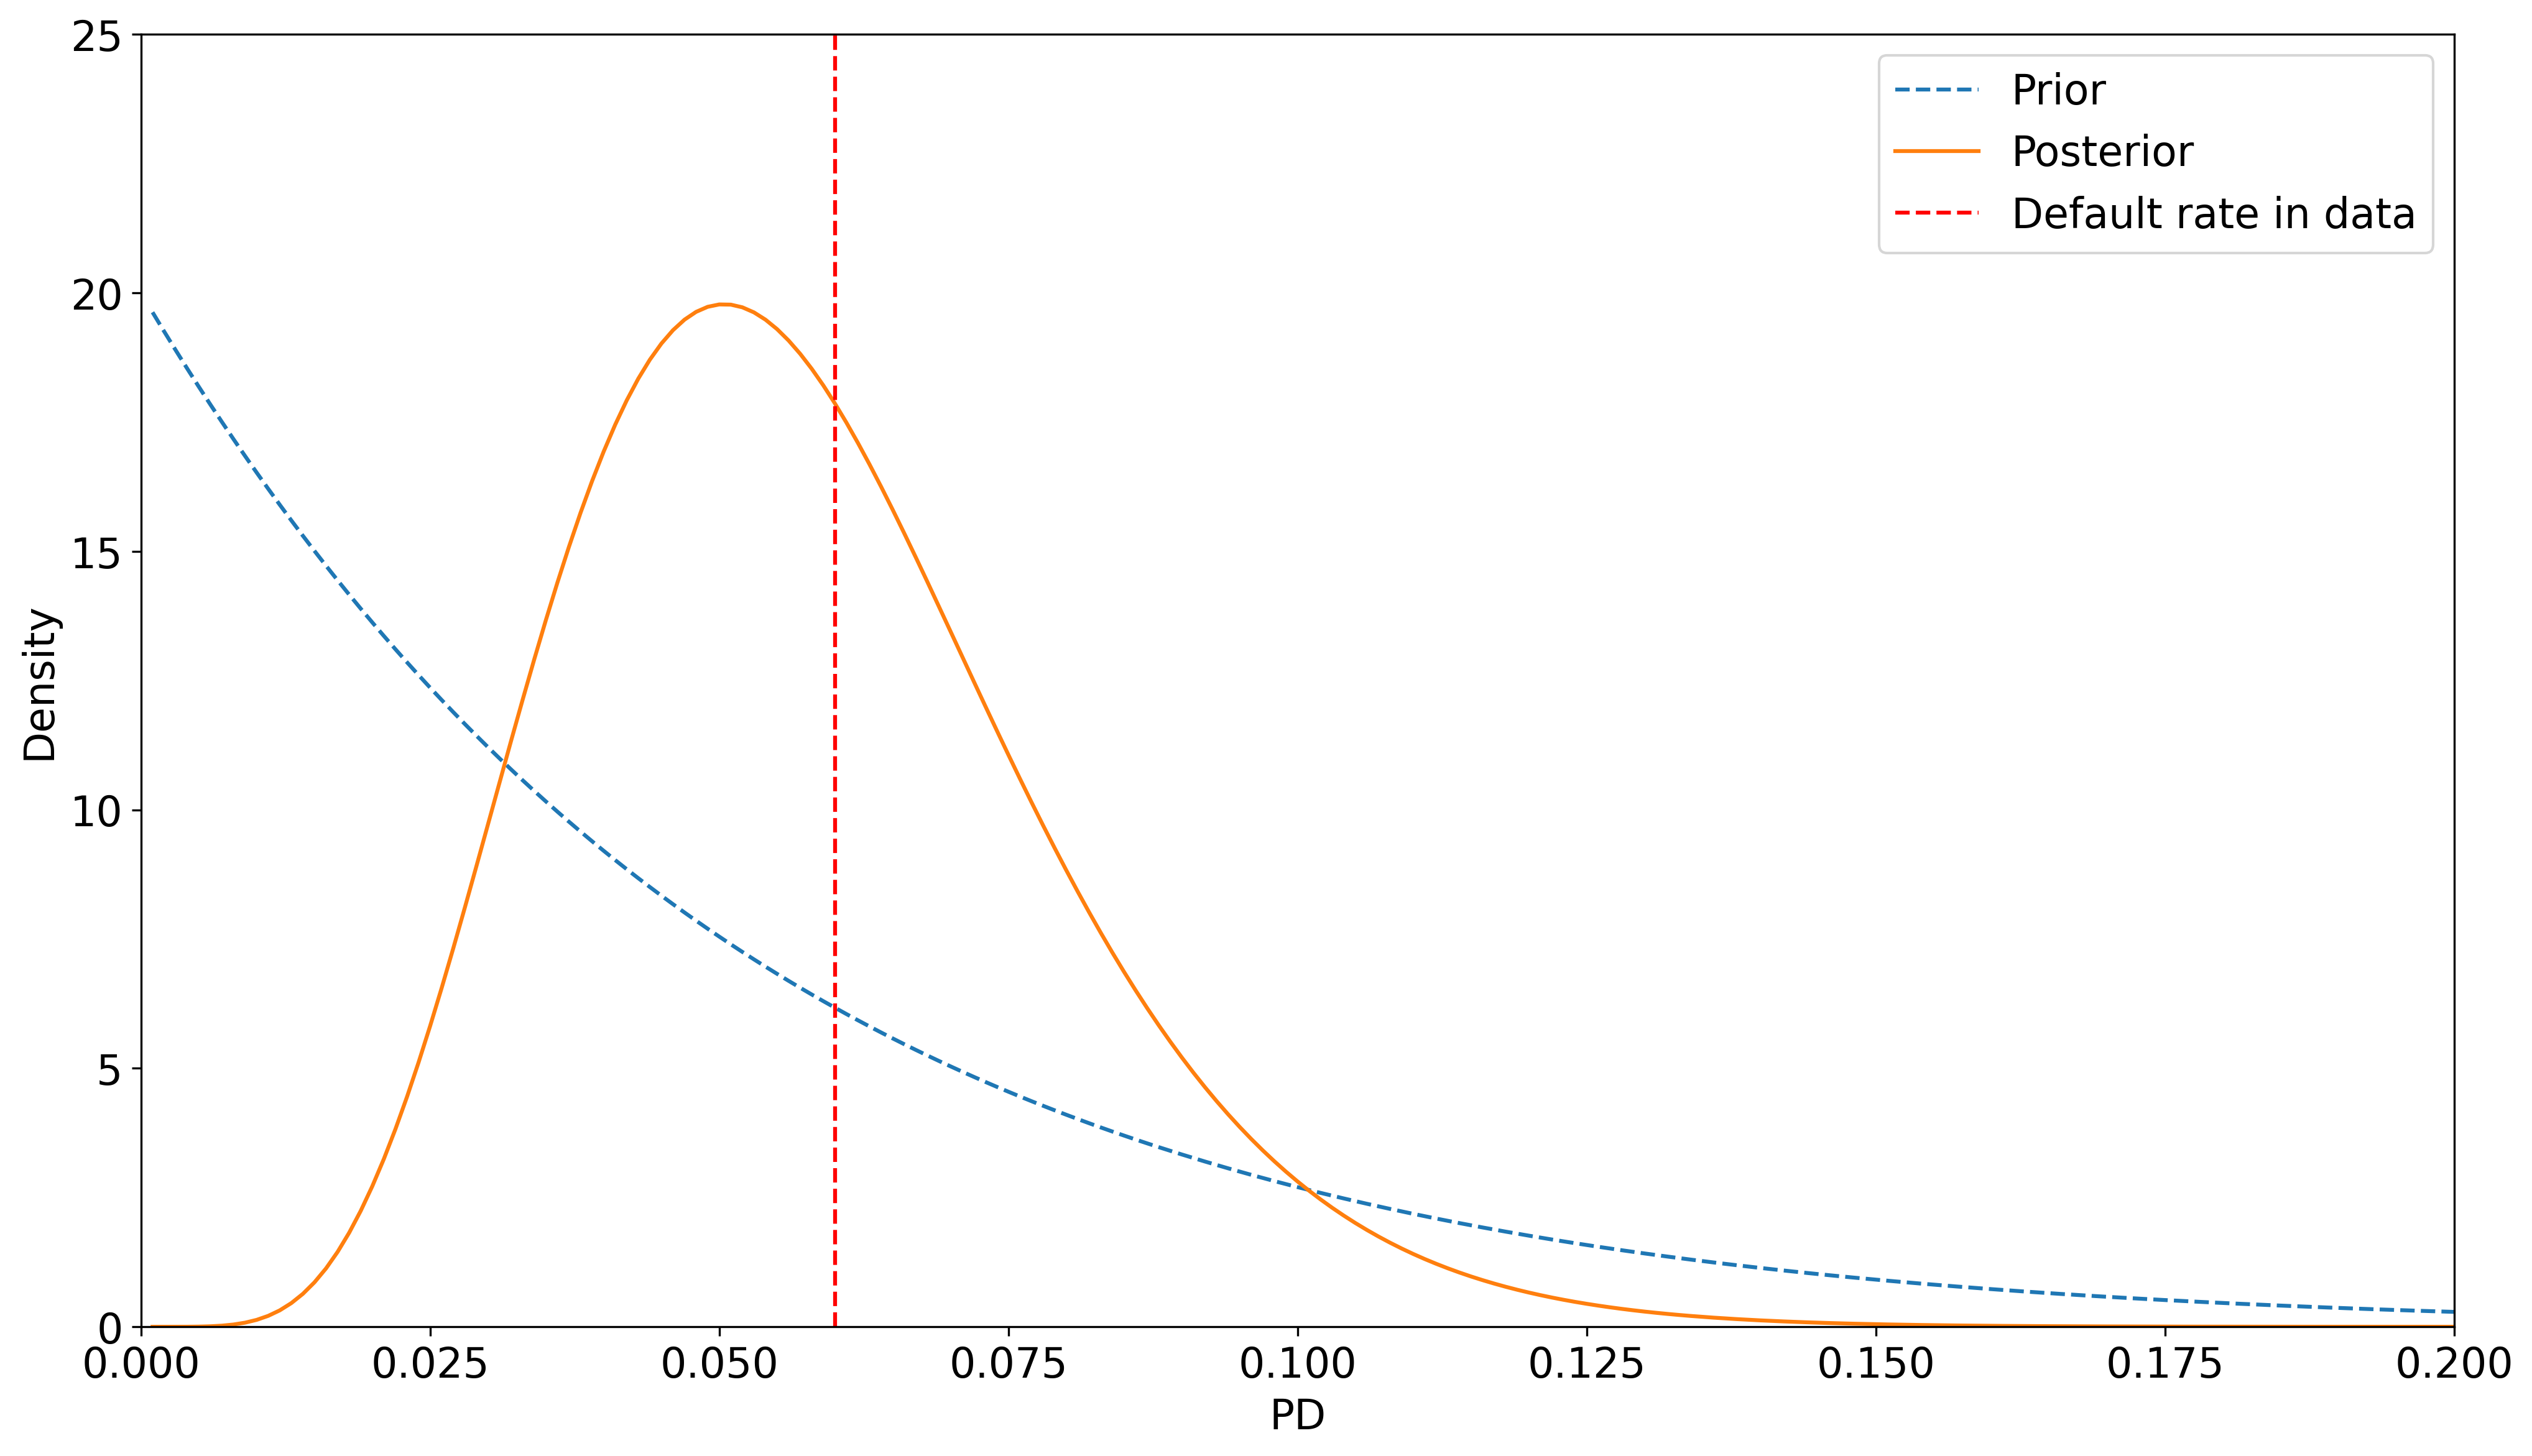

In [6]:
alpha_prior = 1
beta_prior = 20
prior = beta.pdf(pi, alpha_prior, beta_prior, loc=0, scale=1)
alpha_post = alpha_prior + np.sum(y)
beta_post = beta_prior + len(y) - np.sum(y)
posterior = beta.pdf(pi, alpha_post, beta_post, loc=0, scale=1)
posterior_mean = alpha_post/(alpha_post + beta_post)
print('alpha posterior: ', alpha_post)
print('beta posterior: ', beta_post)
print('posterior mean: ', posterior_mean.round(decimals=4))
plt.plot(pi, prior, label="Prior", linestyle='dashed')
plt.plot(pi, posterior, label="Posterior")
plt.plot([np.mean(y), np.mean(y)], [0, 90], linestyle='dashed', color='red', label='Default rate in data')
plt.xlim(0,0.2)
plt.ylim(0,25)
plt.xlabel('PD')
plt.ylabel('Density')
plt.legend(loc='best')
plt.legend()
plt.show()

Again, the actual high observed default rate shift the Posterior to the right of Prior

##### Markov-Chain-Monte-Carlo Simulation

- Use MCMC to simulate posterior distribution, not restricted to the Beta distribution anymore;
- I use PyMC 5.11.7 rather than the book `pymc3`. 

In [7]:
import pymc as pm

with pm.Model() as mdl_PD:
    # Define prior
    PD = pm.Beta('PD', alpha_prior, beta_prior)

    # Defind Binomial likelihood
    likelihood = pm.Binomial('likelihood', n=1, p=PD, observed=y)

In [8]:
# Fix for __spec__ error
if '__spec__' not in globals():
    __spec__ = None


# Next we use NUTS (No U-turn sampler) - for continuous variable, based on Hamiltonian Mechanics
print('Running on PyMC v{}'.format(pm.__version__))
with mdl_PD:
    # Take samples
    # removed step = pm.NUTS() as PyMC 5 automatically uses NUTS (No U-Turn Sampler) by default

    traces_PD = pm.sample(
        draws=2000, 
        tune=2000, 
        progressbar=True, 
        random_seed=12345)
    # set progressbar=False is you want to see the progress

Running on PyMC v5.17.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [PD]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 101 seconds.


traces_PD is Arviz.Inference object

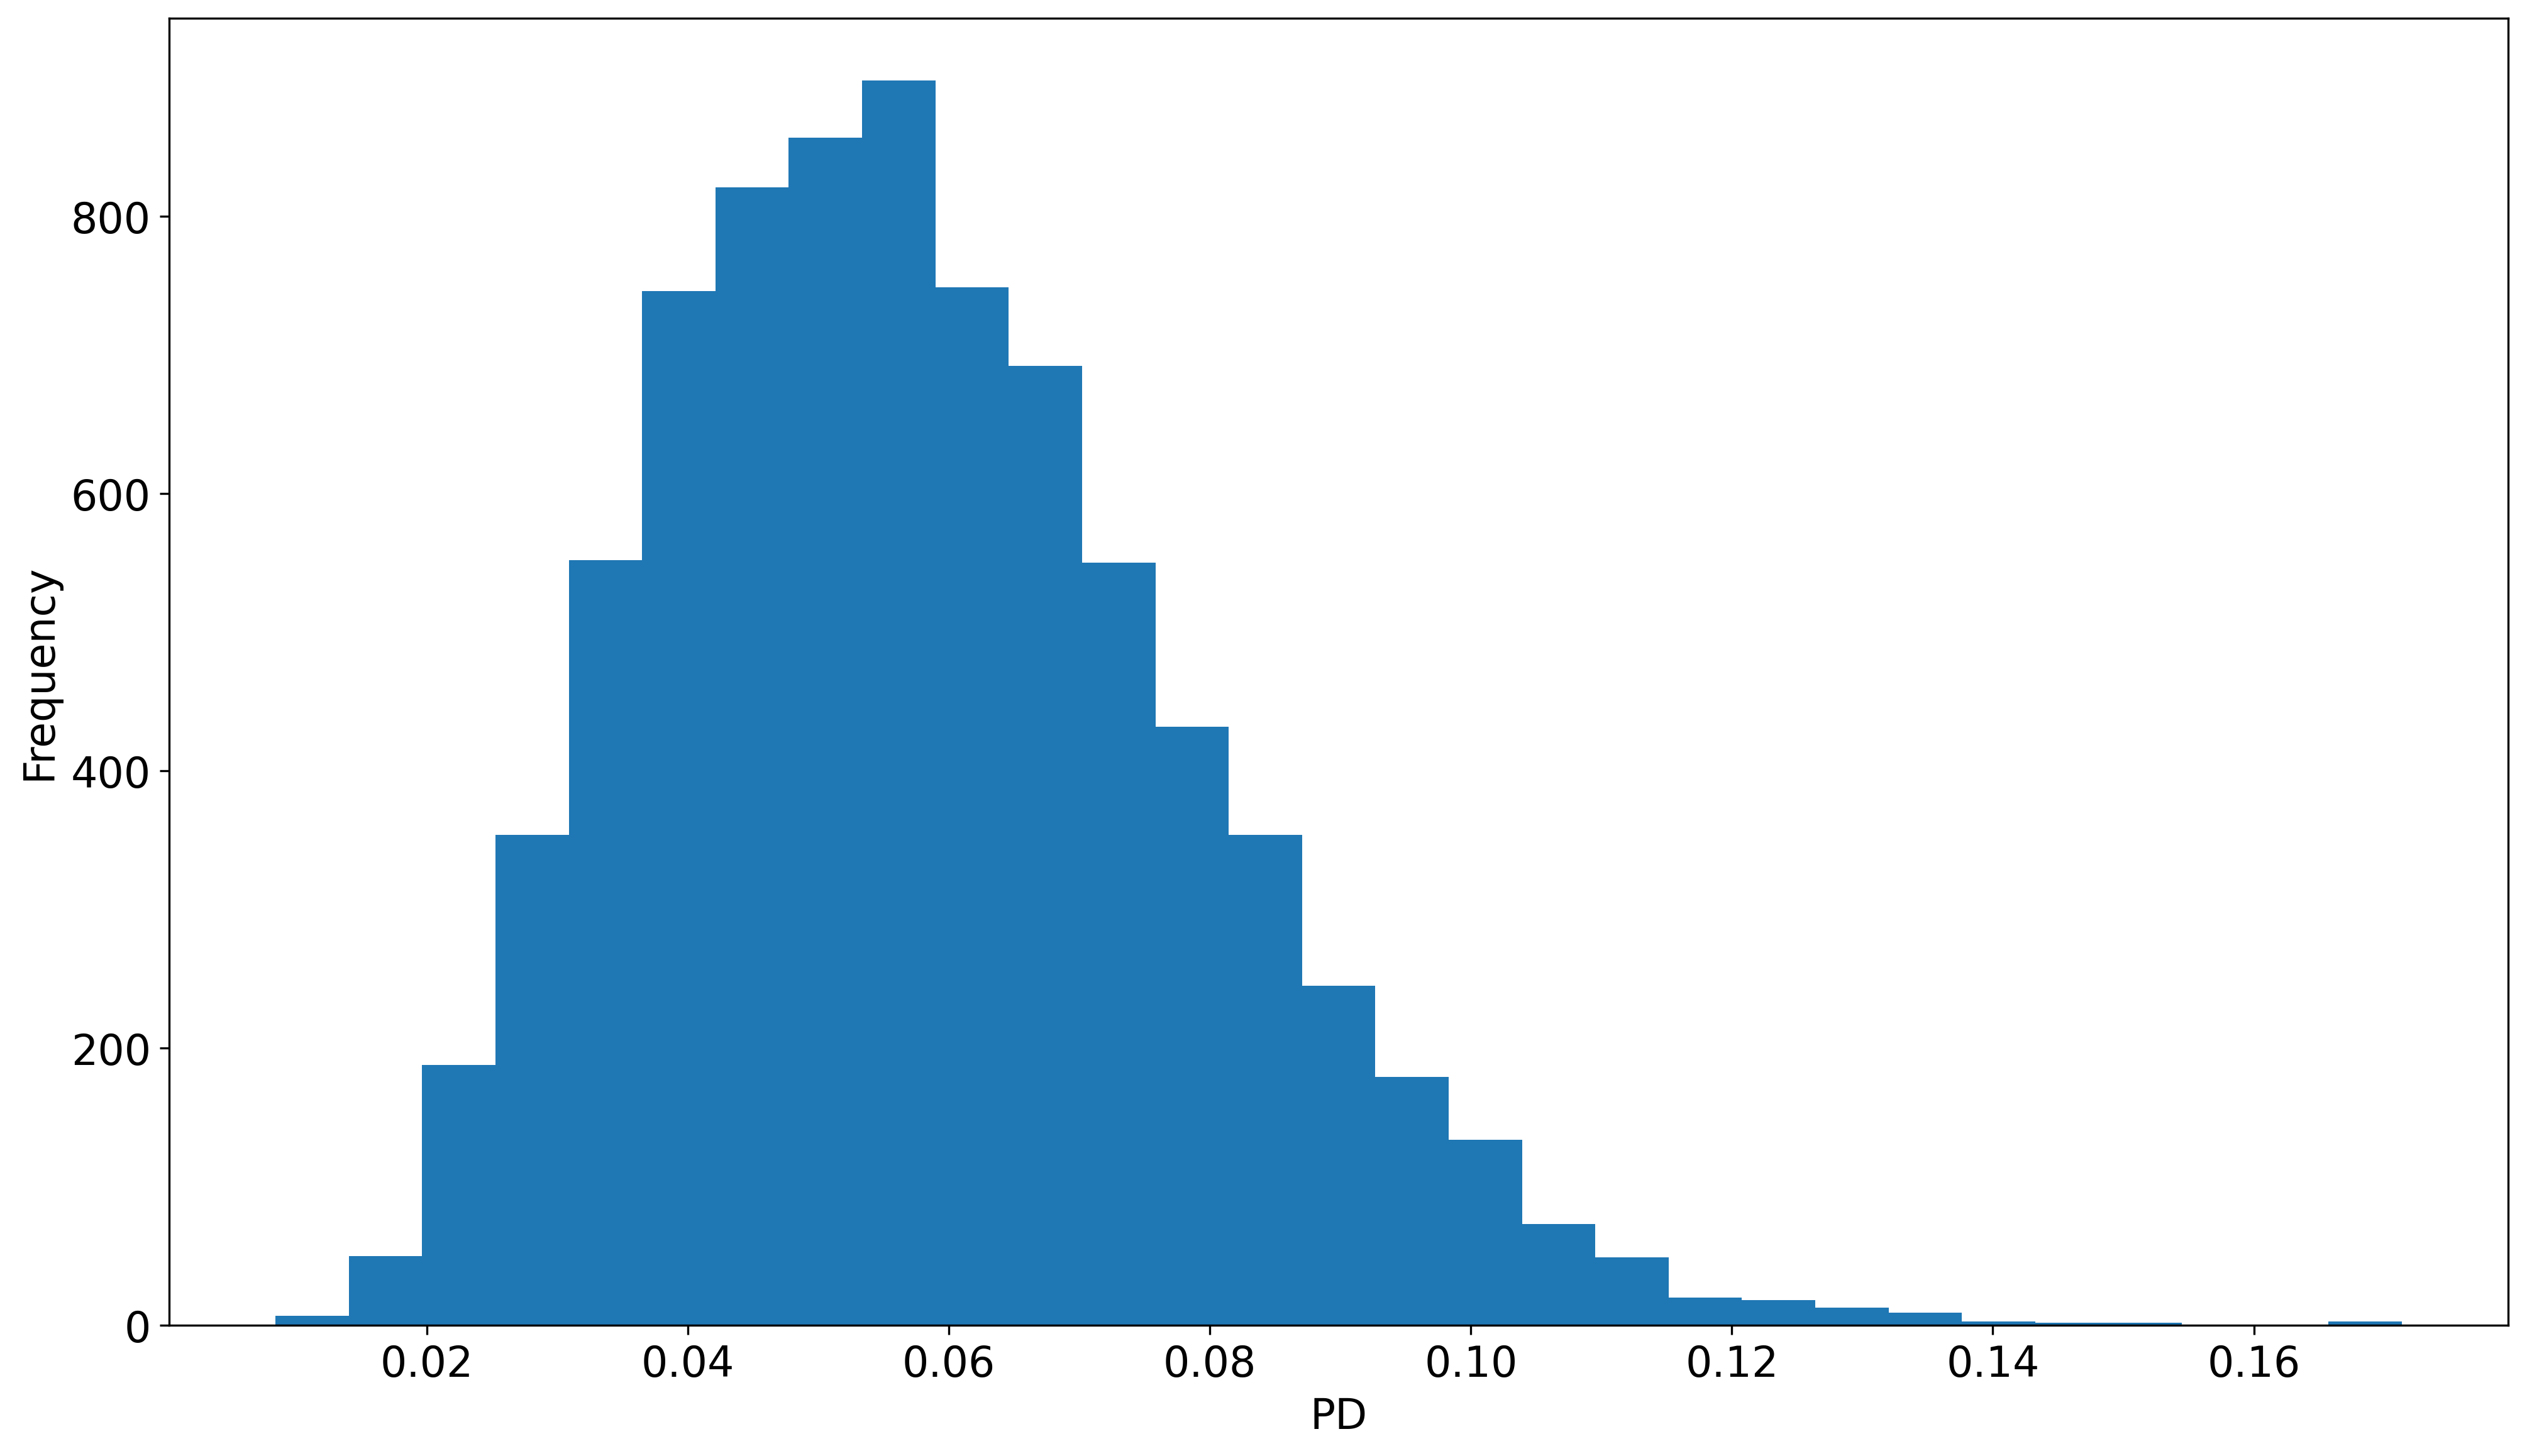

In [9]:
plt.hist(traces_PD.posterior['PD'].values.flatten(), bins=29)
plt.xlabel('PD')
plt.ylabel('Frequency')
plt.show()

Or use `arviz` as recommended

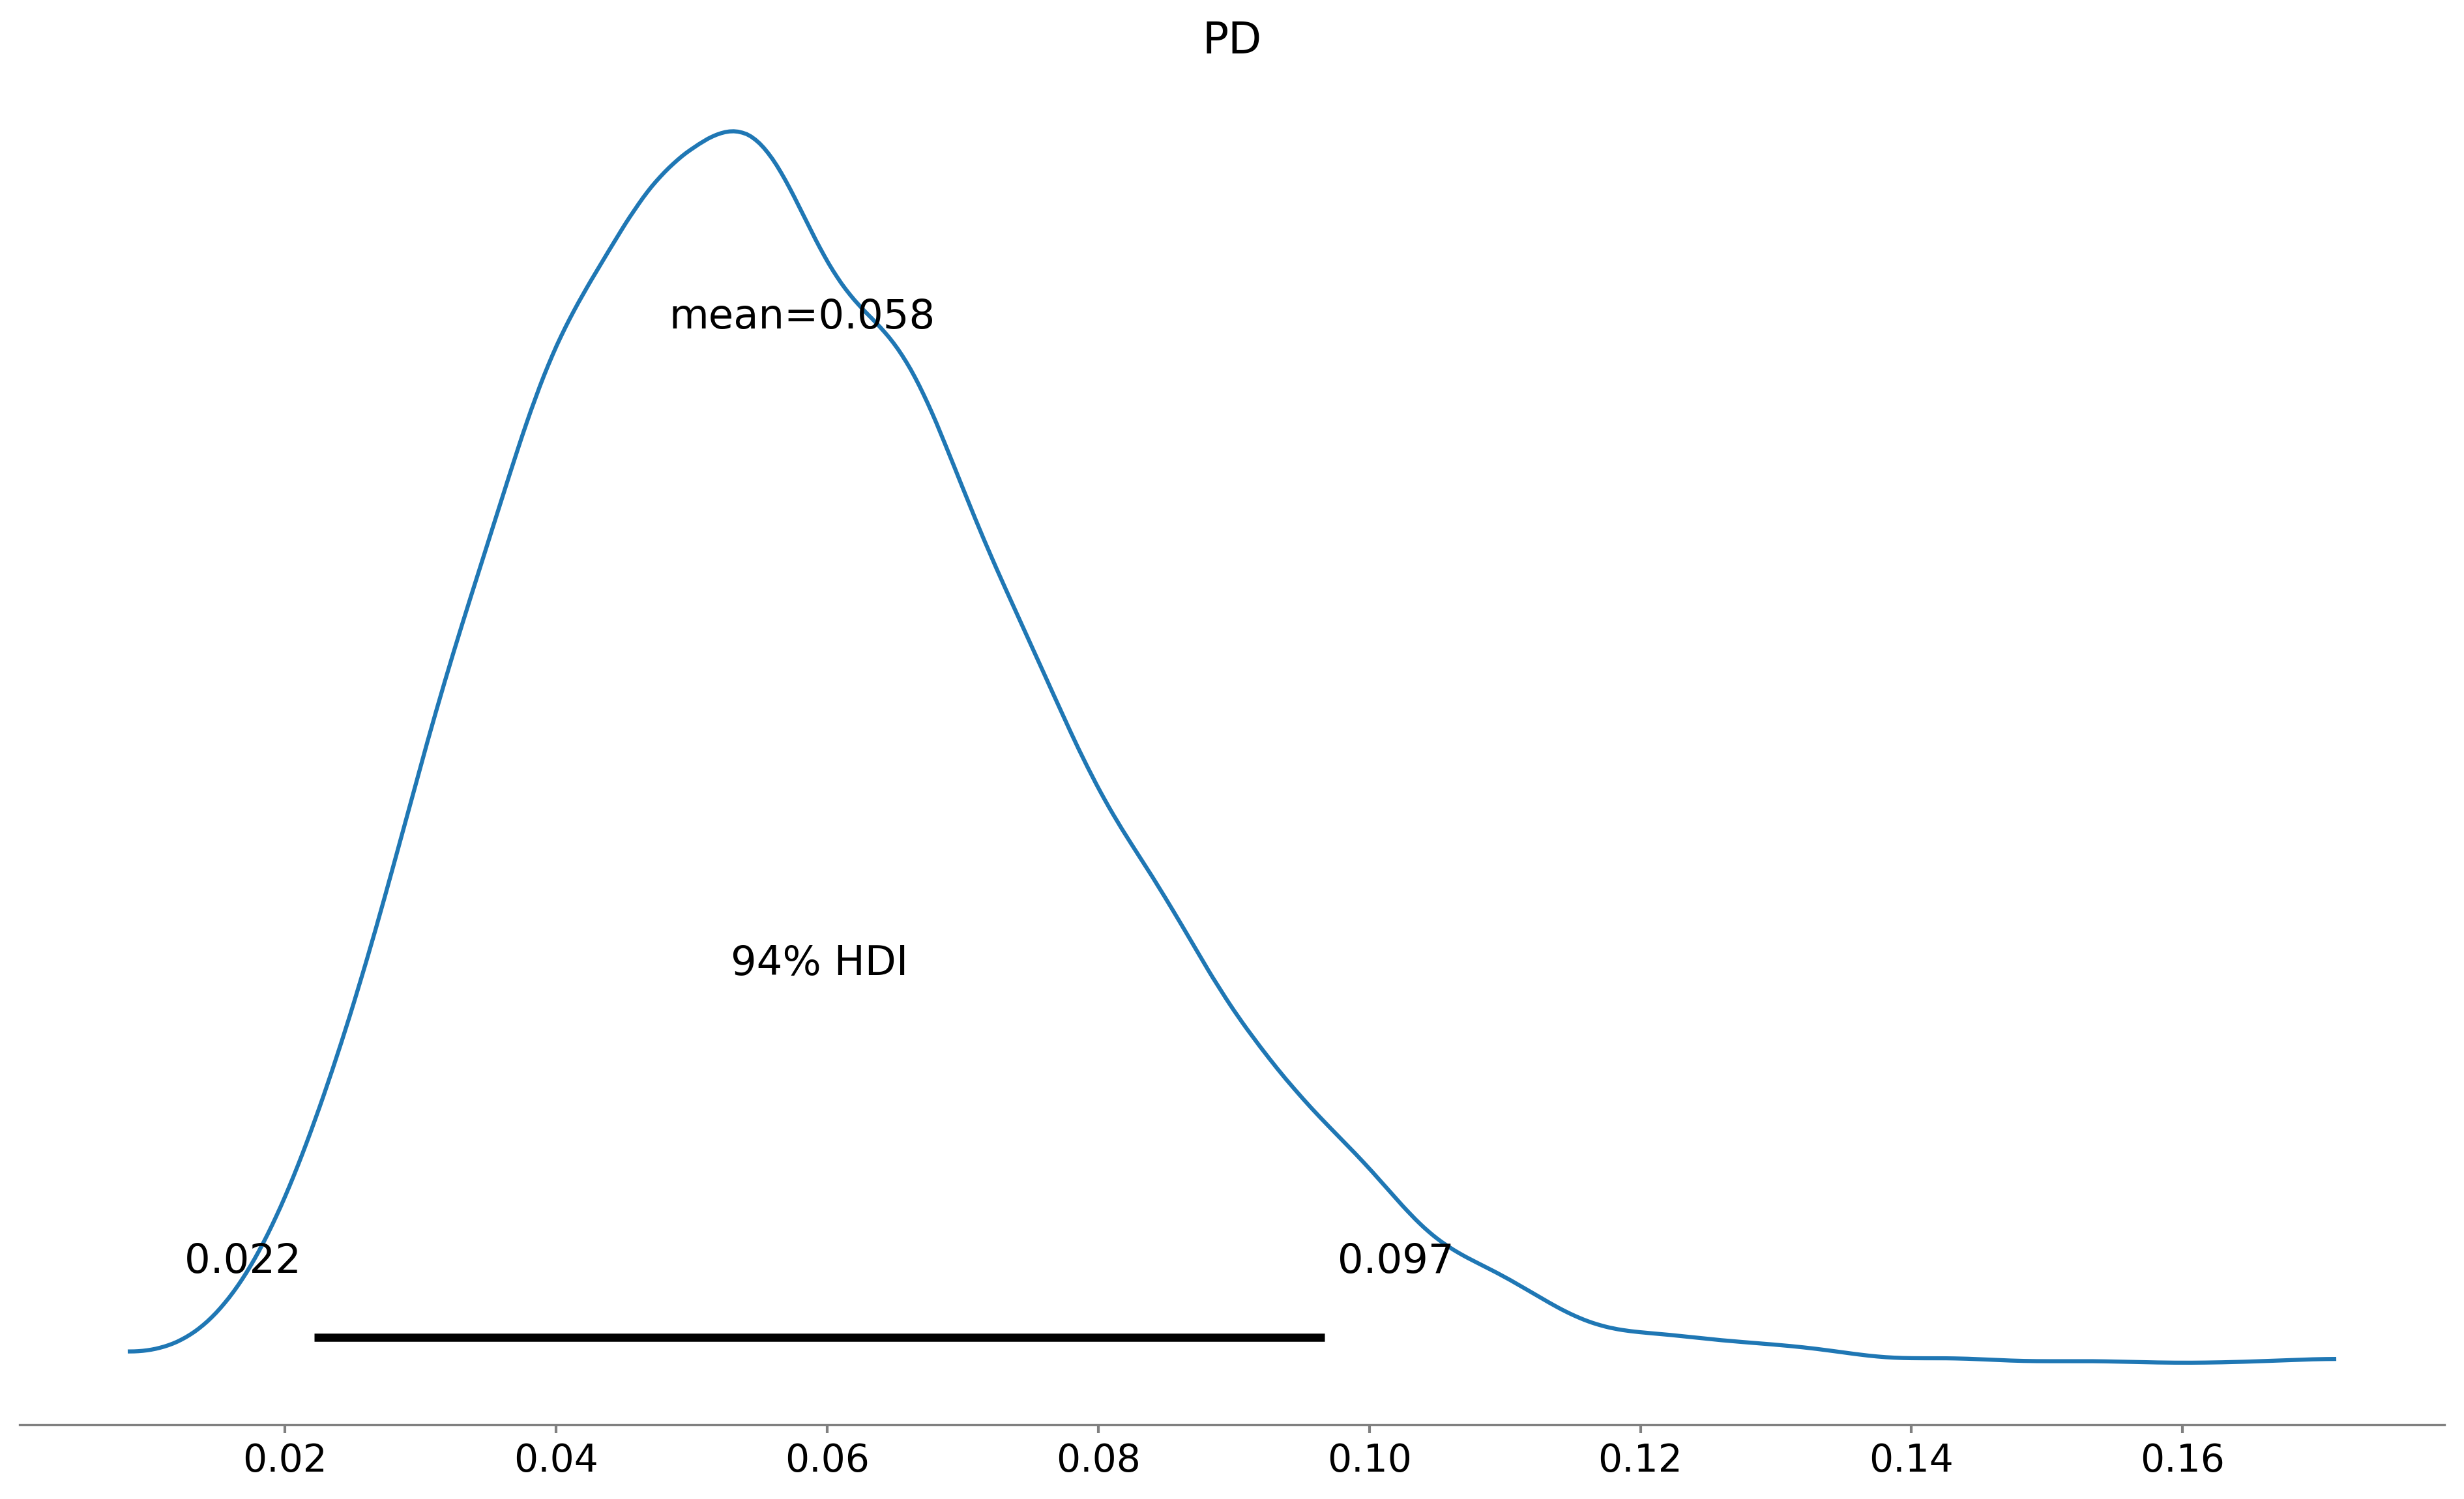

In [10]:
import arviz as az

# Plot histogram of posterior
az.plot_posterior(traces_PD, var_names=['PD'])
plt.show()

Traditional summary

In [11]:
pd.DataFrame(traces_PD.posterior['PD'].values.flatten()).describe()

,0
count,8000.000000
mean,0.058163
std,0.020782
min,0.008394
25%,0.042959
50%,0.055865
75%,0.070969
max,0.171346


Or this:

In [16]:
# Basic summary
summary = az.summary(traces_PD, var_names=['PD'])
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
PD,0.058,0.021,0.022,0.097,0.0,0.0,3318.0,4254.0,1.0


Or this:

In [15]:
# Define a simple mode function
def compute_mode(x):
    # Using numpy's histogram to estimate mode
    counts, bins = np.histogram(x, bins=50)
    mode_index = np.argmax(counts)
    return (bins[mode_index] + bins[mode_index + 1]) / 2

# Summary with custom statistics
summary_detailed = az.summary(
    traces_PD, 
    var_names=['PD'],
    hdi_prob=0.95,    # 95% Highest Density Interval
    round_to=6,       # decimal places
    stat_funcs={'mode': compute_mode}  # add custom mode calculation
)
summary_detailed

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,mode
PD,0.058163,0.020782,0.022074,0.0994,0.000349,0.000247,3318.489158,4254.430508,1.001491,0.05565


### Sandbox problems

Compute the likelihood for default probabilities ranging from zero to one in 1% intervals for the mortgage dataset without controlling for any features. What is the maximum-likelihood estimate for the default probability?

Assume an expert informed you that the prior probability of default is 50%. What is the expected value of the posterior distribution for the default probability for the mortgage data set?

# 4 Machine Learning
pg. 68-90

In [ ]:
%reset

import warnings; warnings.simplefilter('ignore')
from dcr import *
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams.update({'font.size': 16})